In [1]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('/content/drive/MyDrive/data.csv')

In [7]:
df.columns

Index(['index', 'Lever position ', 'Ship speed (v) ',
       'Gas Turbine (GT) shaft torque (GTT) [kN m]  ',
       'GT rate of revolutions (GTn) [rpm]  ',
       'Gas Generator rate of revolutions (GGn) [rpm]  ',
       'Starboard Propeller Torque (Ts) [kN]  ',
       'Port Propeller Torque (Tp) [kN]  ',
       'Hight Pressure (HP) Turbine exit temperature (T48) [C]  ',
       'GT Compressor inlet air temperature (T1) [C]  ',
       'GT Compressor outlet air temperature (T2) [C]  ',
       'HP Turbine exit pressure (P48) [bar]  ',
       'GT Compressor inlet air pressure (P1) [bar]  ',
       'GT Compressor outlet air pressure (P2) [bar]  ',
       'GT exhaust gas pressure (Pexh) [bar]  ',
       'Turbine Injecton Control (TIC) [%]  ', 'Fuel flow (mf) [kg/s]  ',
       'GT Compressor decay state coefficient  ',
       'GT Turbine decay state coefficient '],
      dtype='object')

In [8]:
df.columns=['Index','Level_Pos','Speed','GTT','GTn','GGn','Ts','Tp','Texit','T1','T2','Pexit','P1','P2','Pexh','TIC','F','Comp_Decay','Turbine_Decay']

In [9]:
df.head()

,Index,Level_Pos,Speed,GTT,GTn,GGn,Ts,Tp,Texit,T1,T2,Pexit,P1,P2,Pexh,TIC,F,Comp_Decay,Turbine_Decay
0,0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,288,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,288,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,288,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,288,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,4,5.140,15,21636.432,1924.313,8494.777,175.306,175.306,731.494,288,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [10]:
df.drop(columns=['Index'],inplace=True)

In [12]:
df.isnull().sum()

Level_Pos        0
Speed            0
GTT              0
GTn              0
GGn              0
Ts               0
Tp               0
Texit            0
T1               0
T2               0
Pexit            0
P1               0
P2               0
Pexh             0
TIC              0
F                0
Comp_Decay       0
Turbine_Decay    0
dtype: int64

In [13]:
df.duplicated().any()

False

In [14]:
X=df.drop(columns=['Comp_Decay','Turbine_Decay'])
y1=df['Comp_Decay']
y2=df['Turbine_Decay']

In [15]:
X

,Level_Pos,Speed,GTT,GTn,GGn,Ts,Tp,Texit,T1,T2,Pexit,P1,P2,Pexh,TIC,F
0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,288,550.563,1.096,0.998,5.947,1.019,7.137,0.082
1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,288,581.658,1.331,0.998,7.282,1.019,10.655,0.287
2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,288,587.587,1.389,0.998,7.574,1.020,13.086,0.259
3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,288,613.851,1.658,0.998,9.007,1.022,18.109,0.358
4,5.140,15,21636.432,1924.313,8494.777,175.306,175.306,731.494,288,645.642,2.078,0.998,11.197,1.026,26.373,0.522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,15,21624.934,1924.342,8470.013,175.239,175.239,681.658,288,628.950,2.087,0.998,10.990,1.027,23.803,0.471
11930,6.175,18,29763.213,2306.745,8800.352,245.954,245.954,747.405,288,658.853,2.512,0.998,13.109,1.031,32.671,0.647
11931,7.148,21,39003.867,2678.052,9120.889,332.389,332.389,796.457,288,680.393,2.982,0.998,15.420,1.036,42.104,0.834
11932,8.206,24,50992.579,3087.434,9300.274,438.024,438.024,892.945,288,722.029,3.594,0.998,18.293,1.043,58.064,1.149


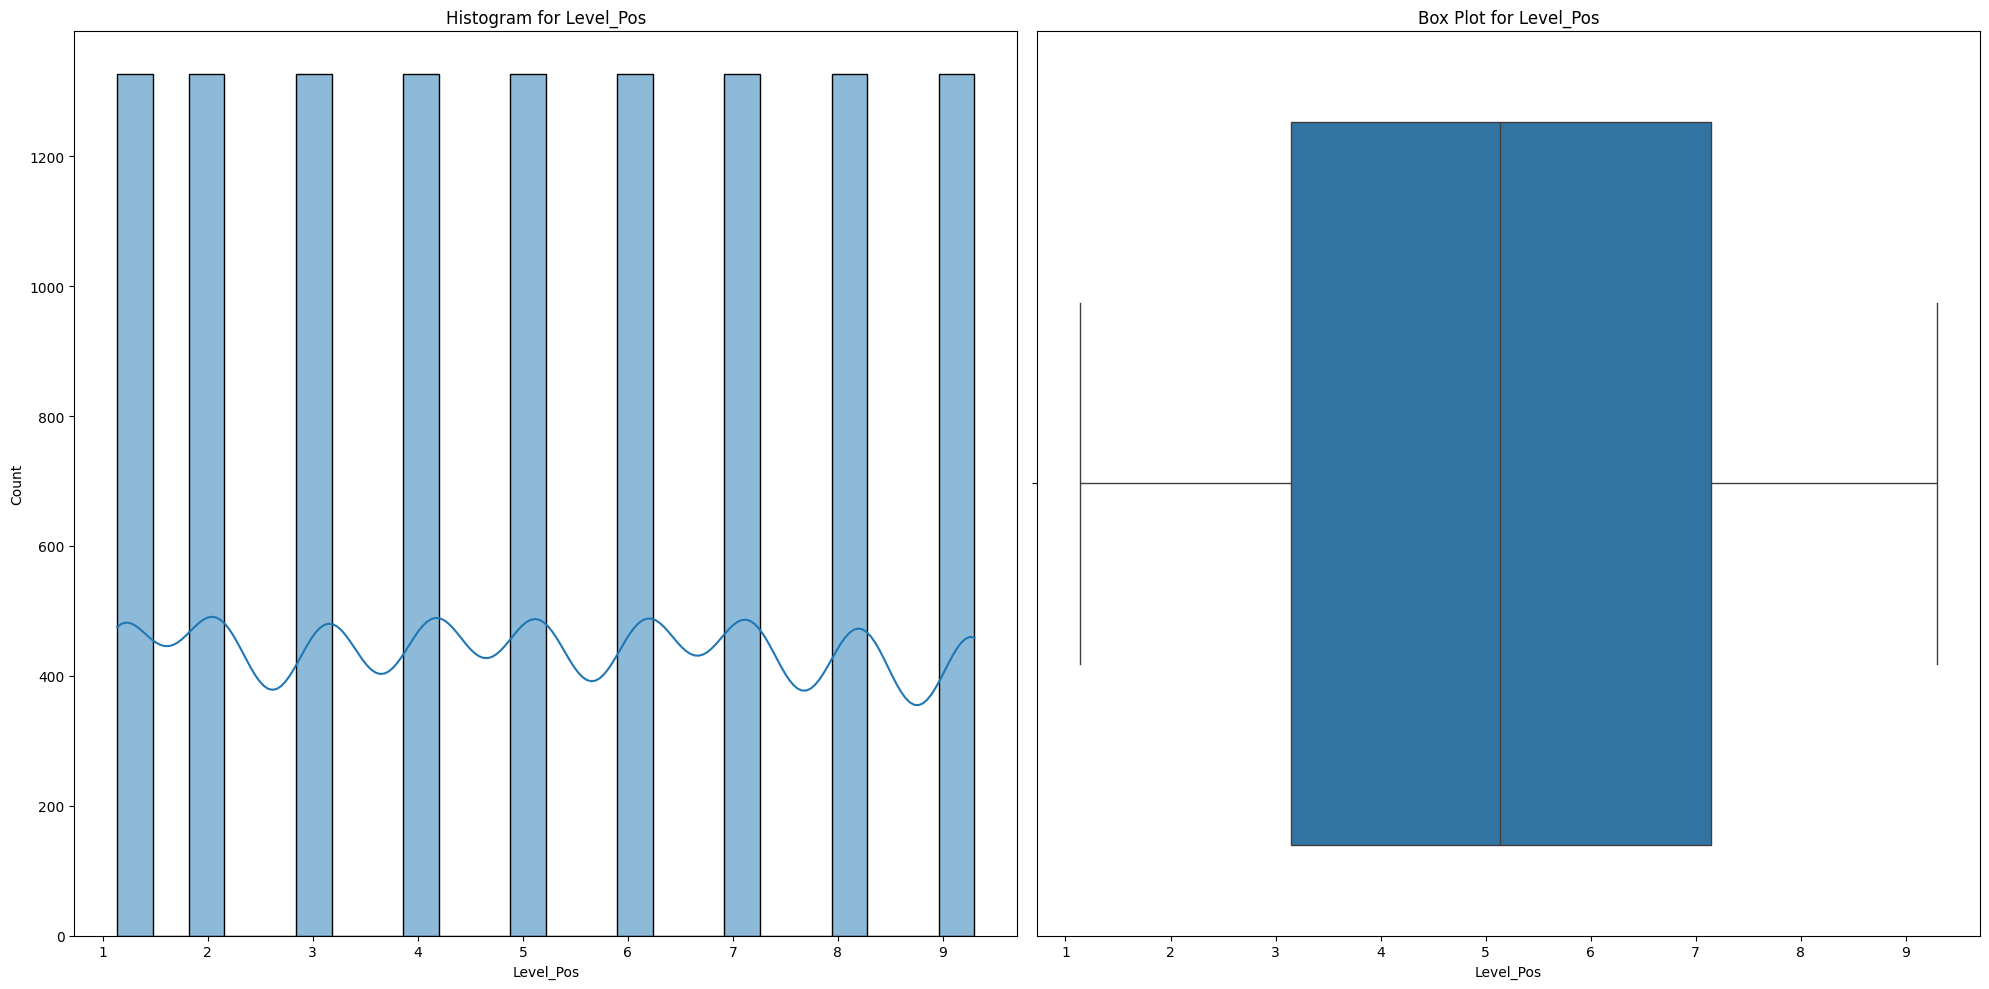

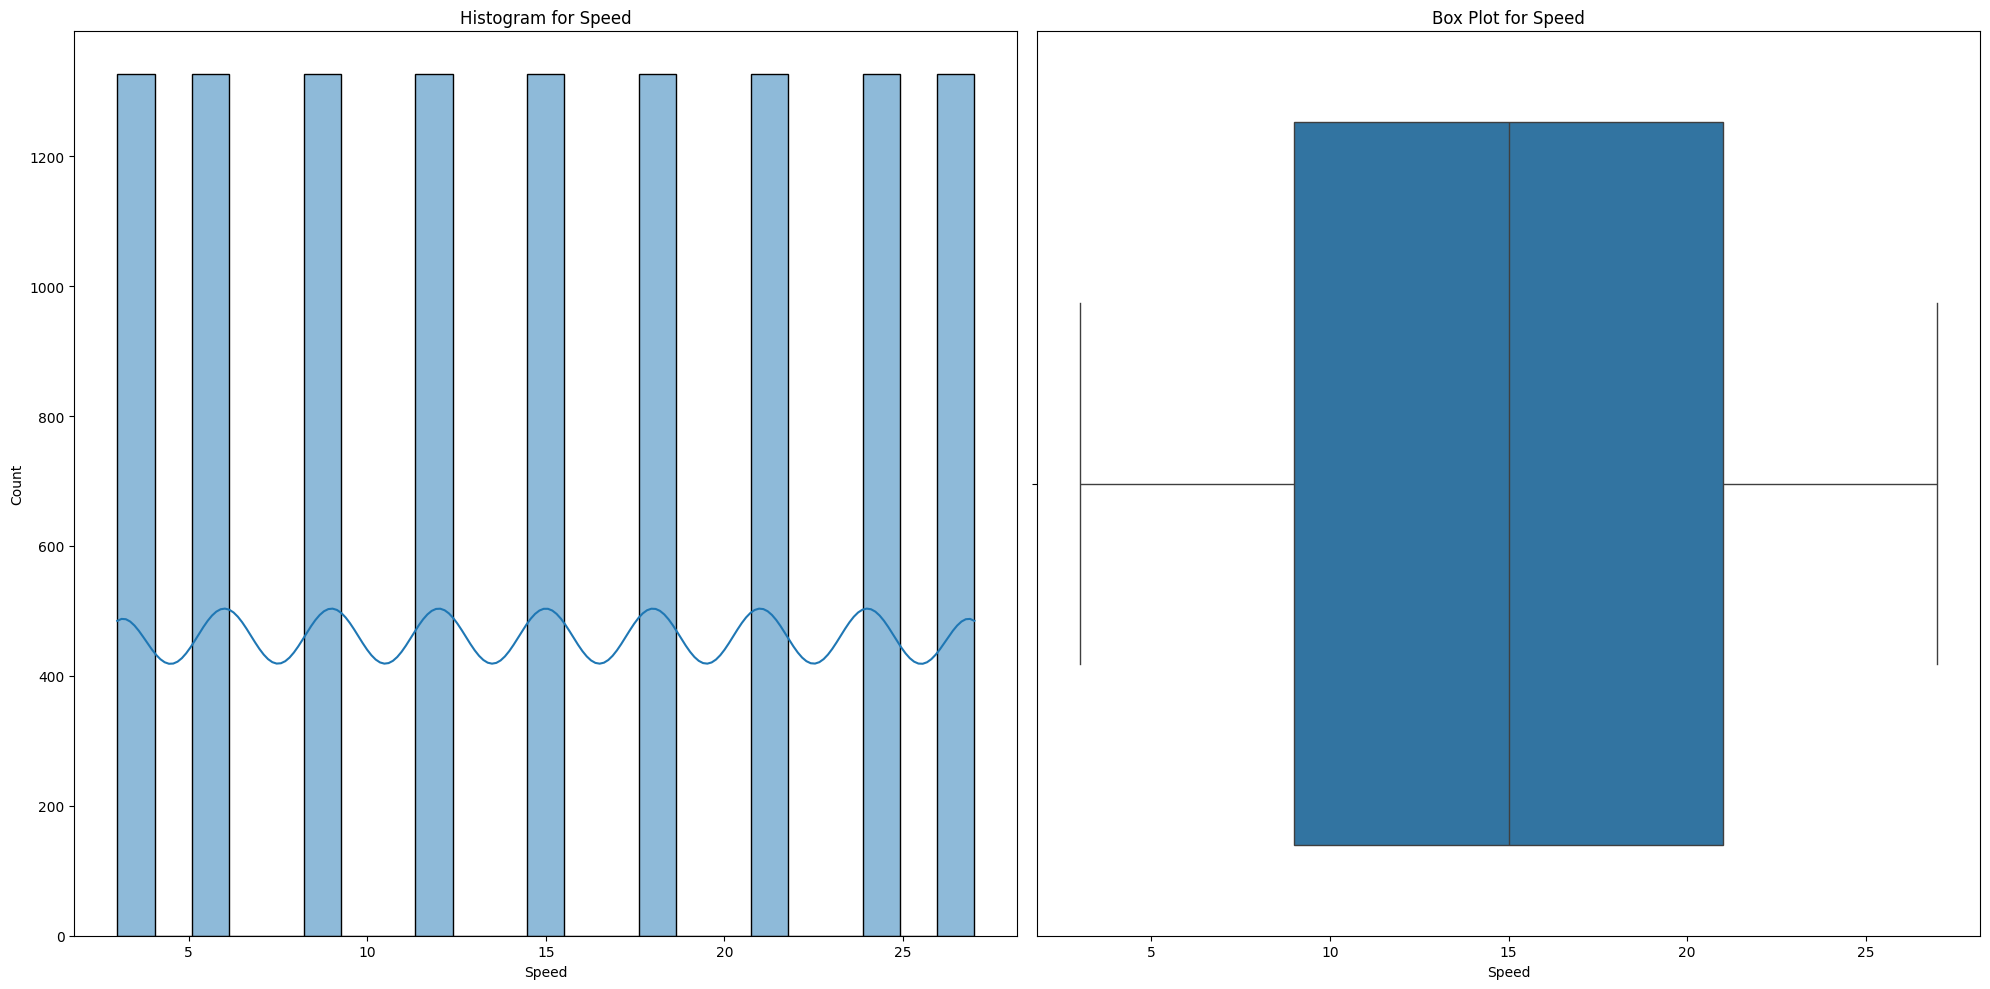

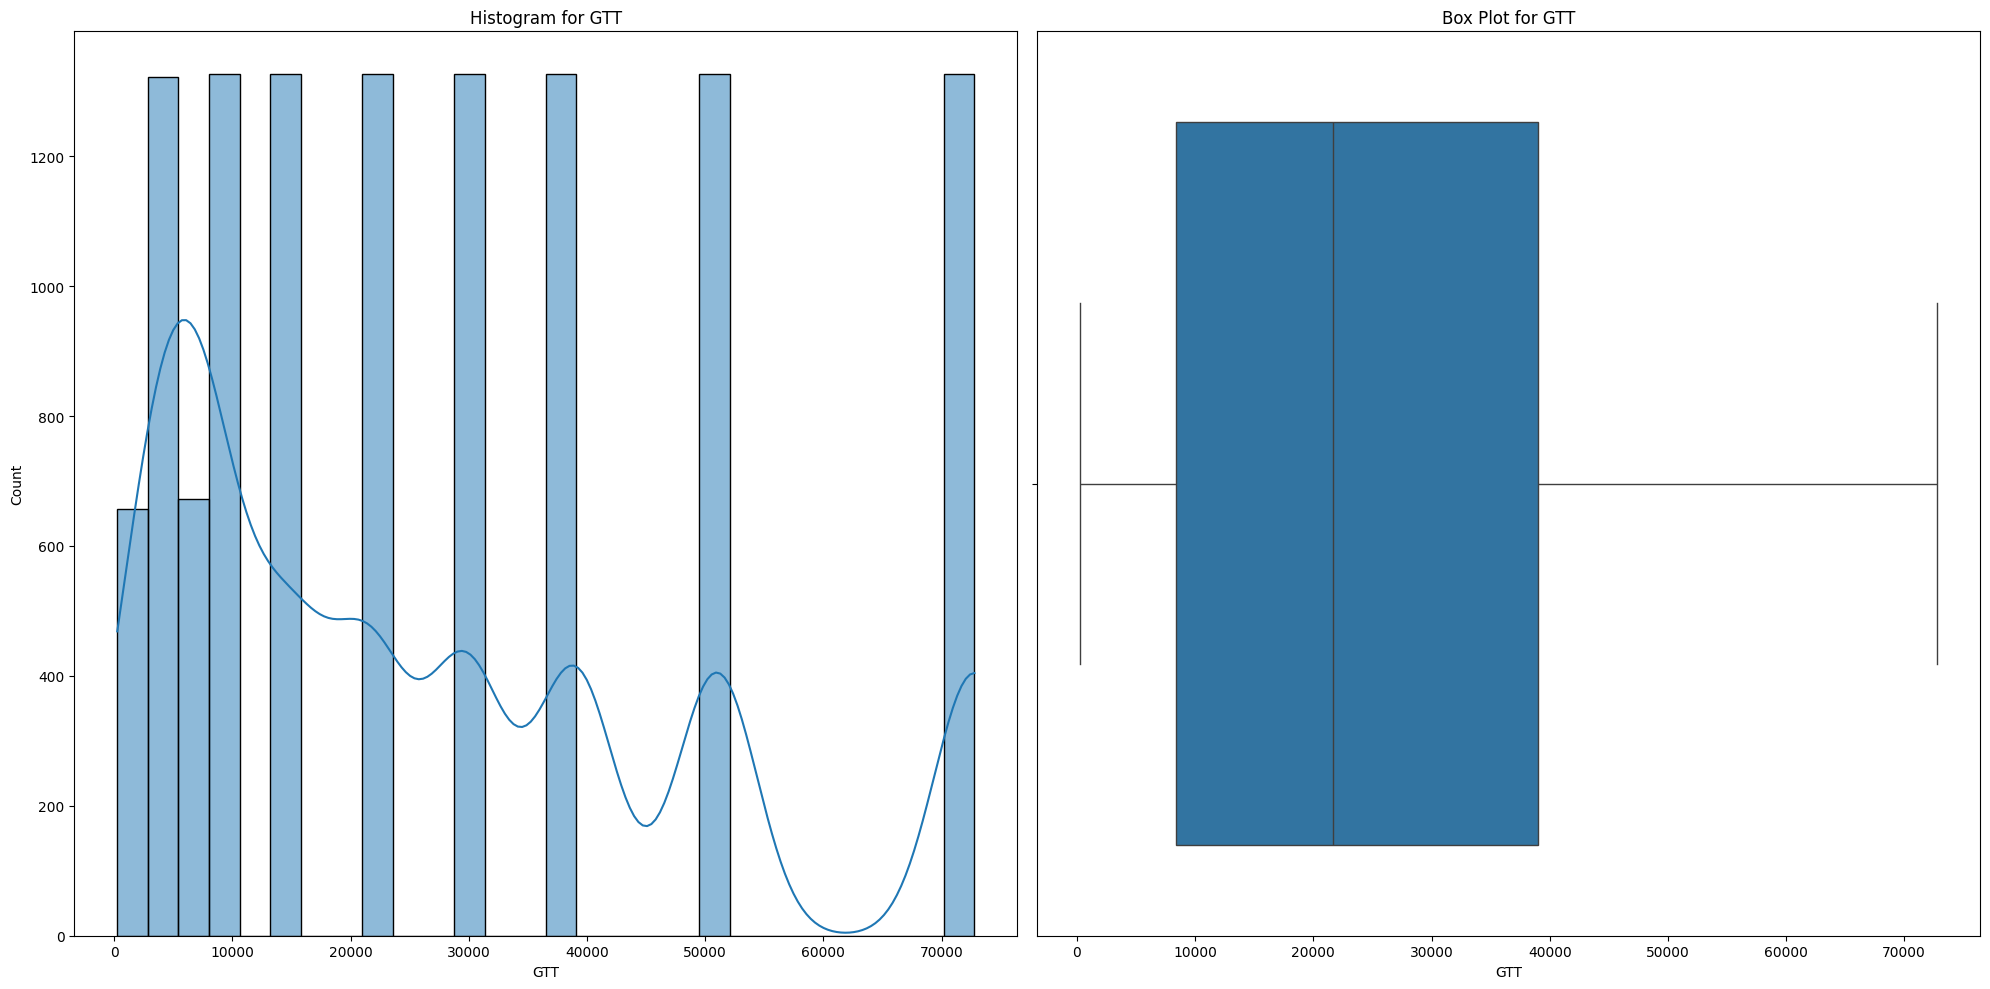

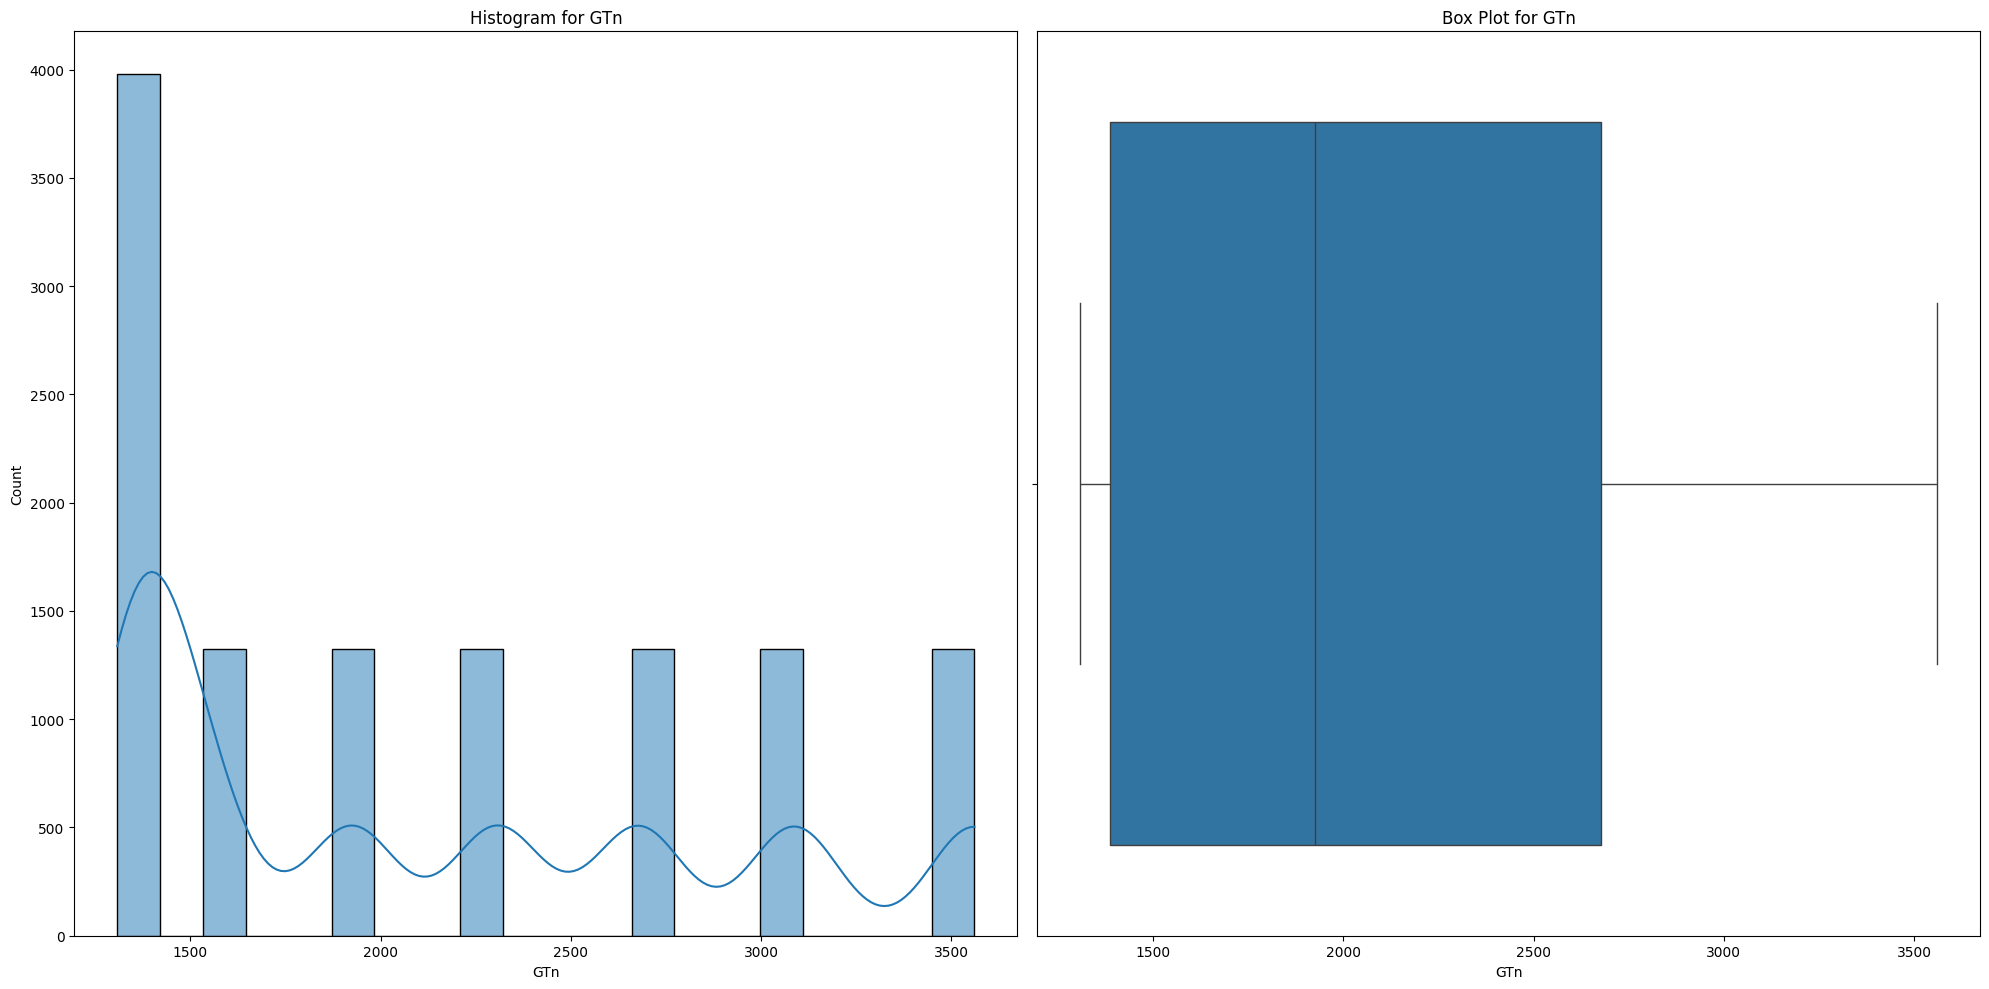

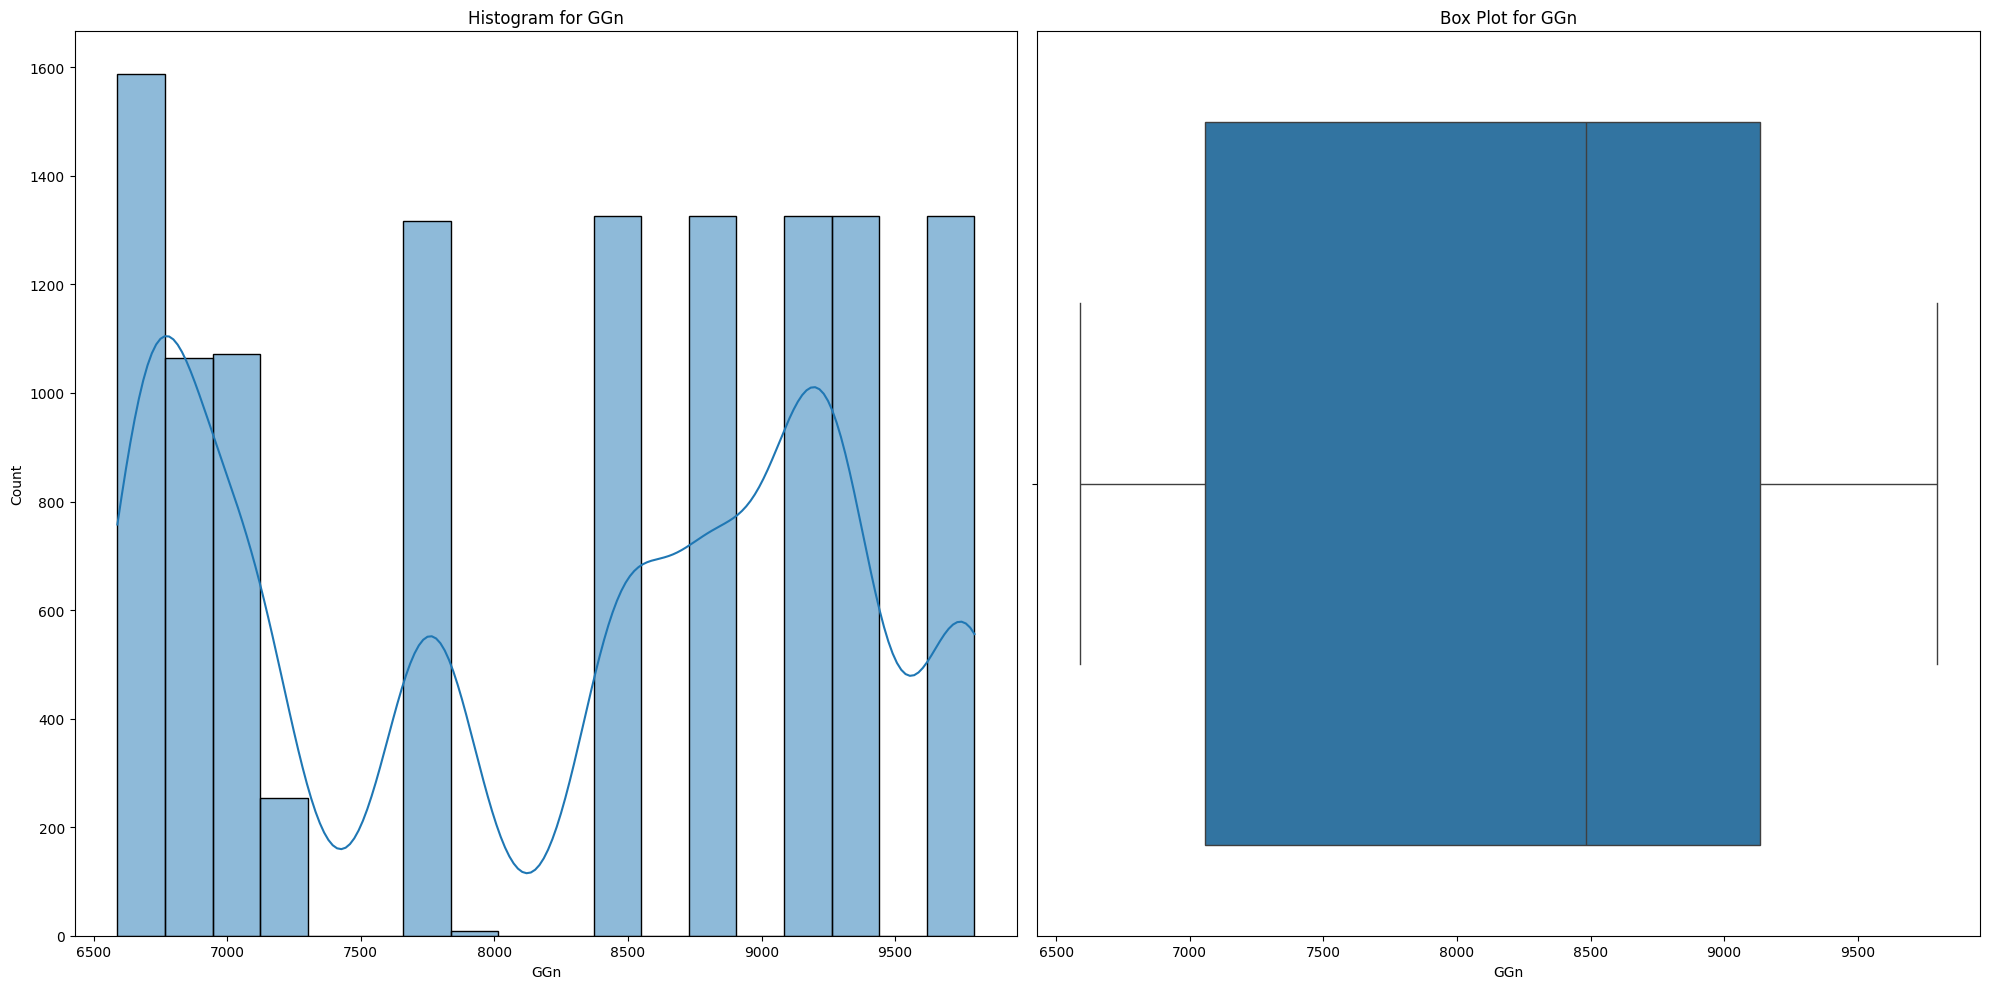

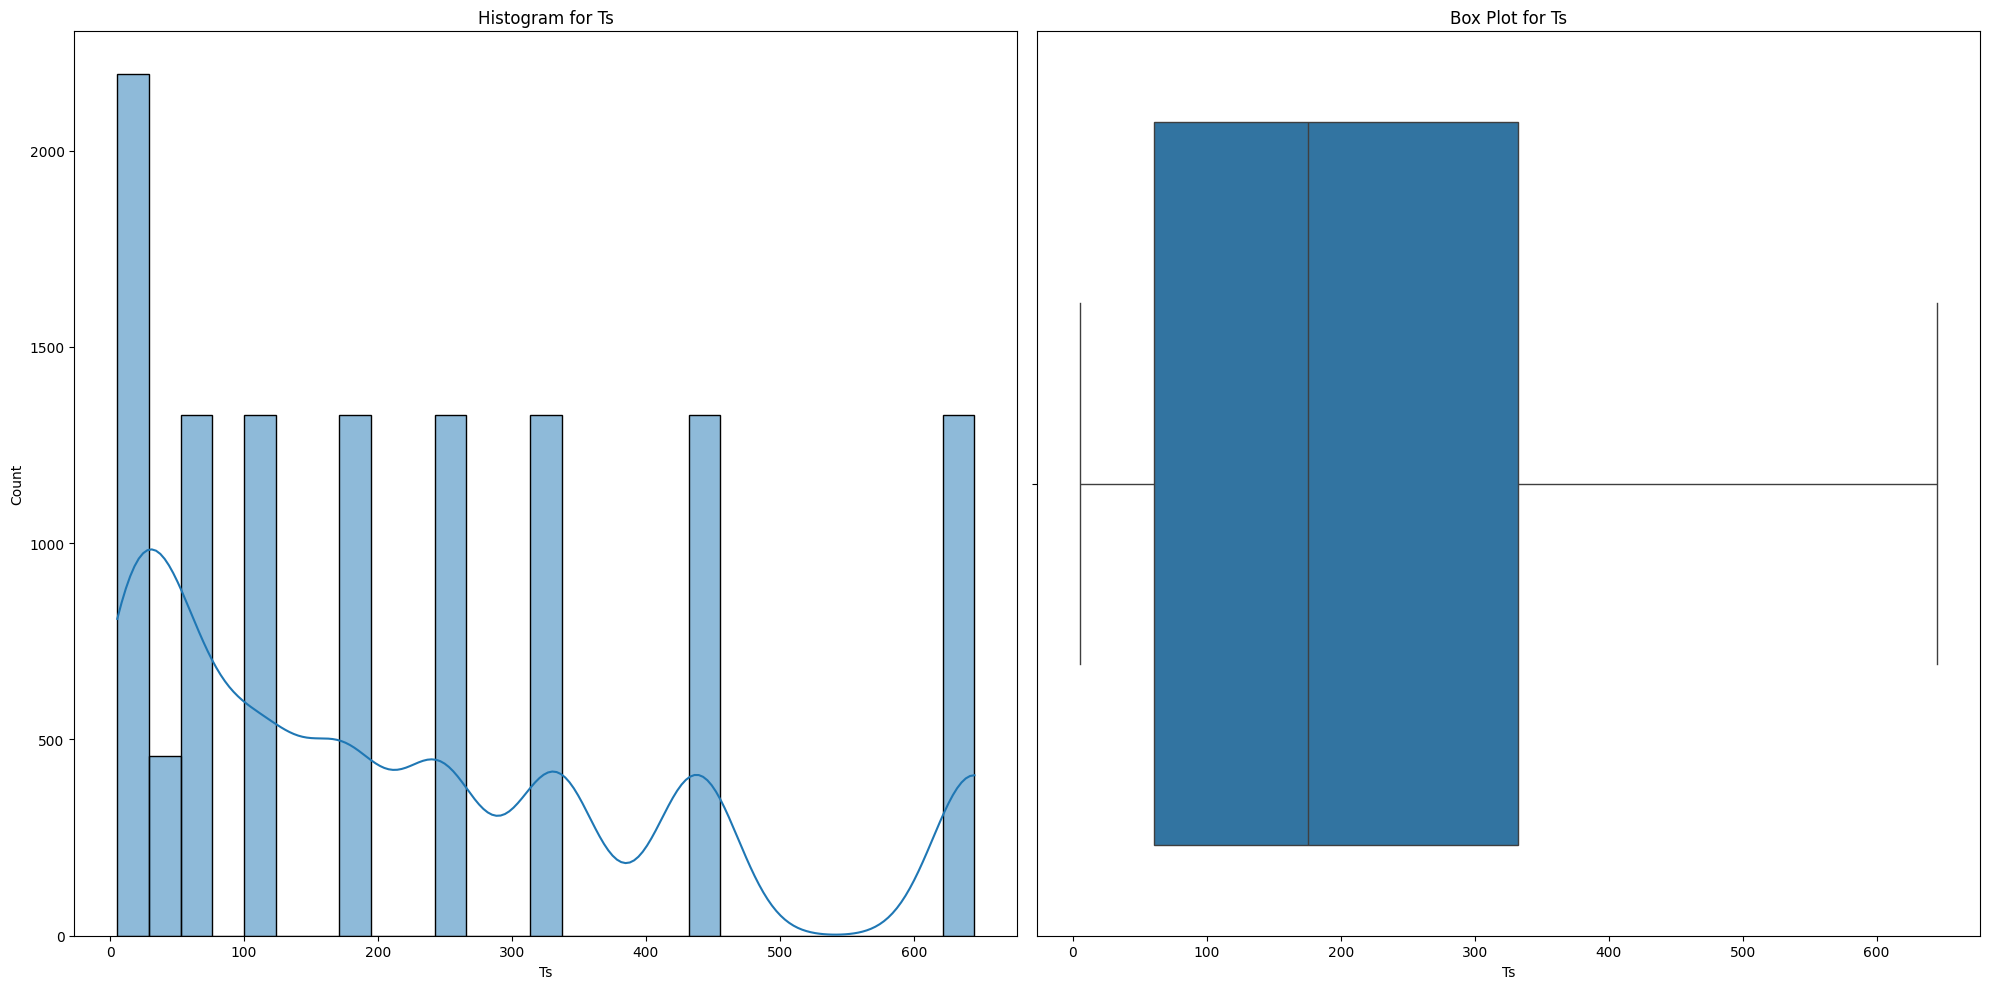

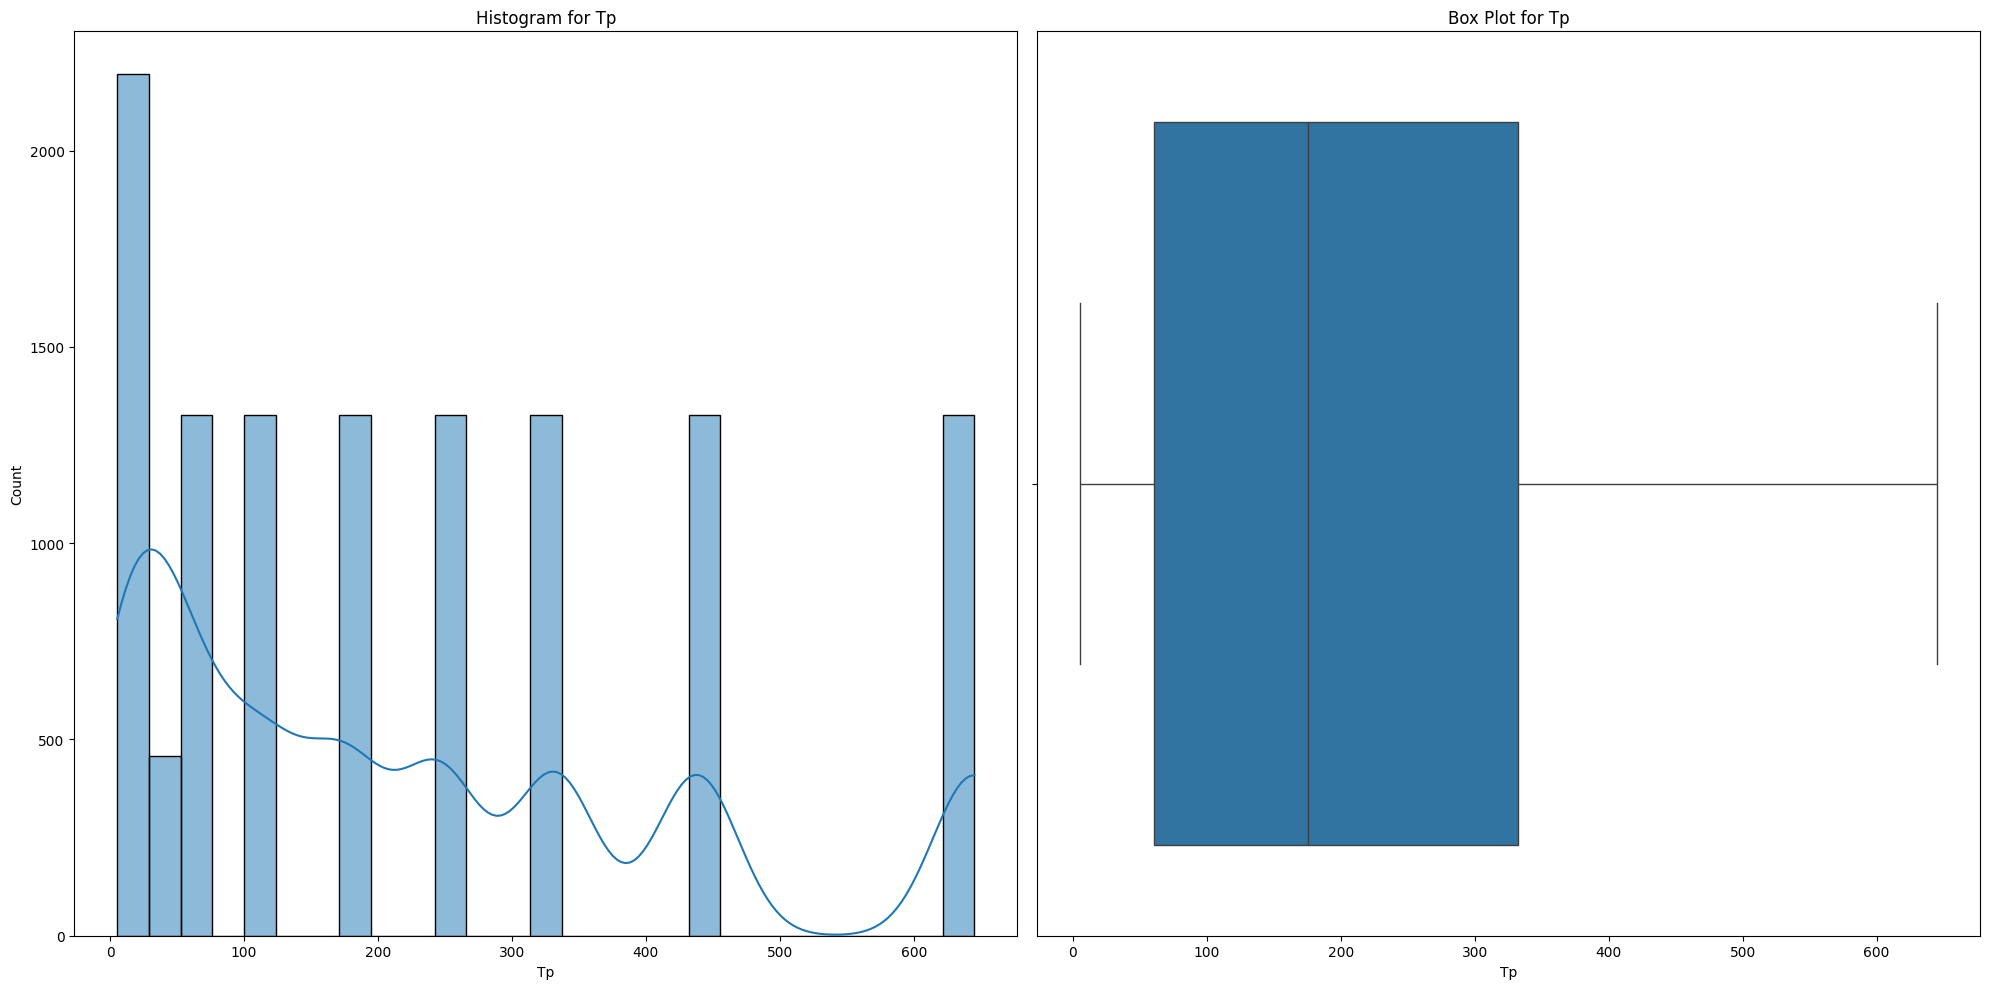

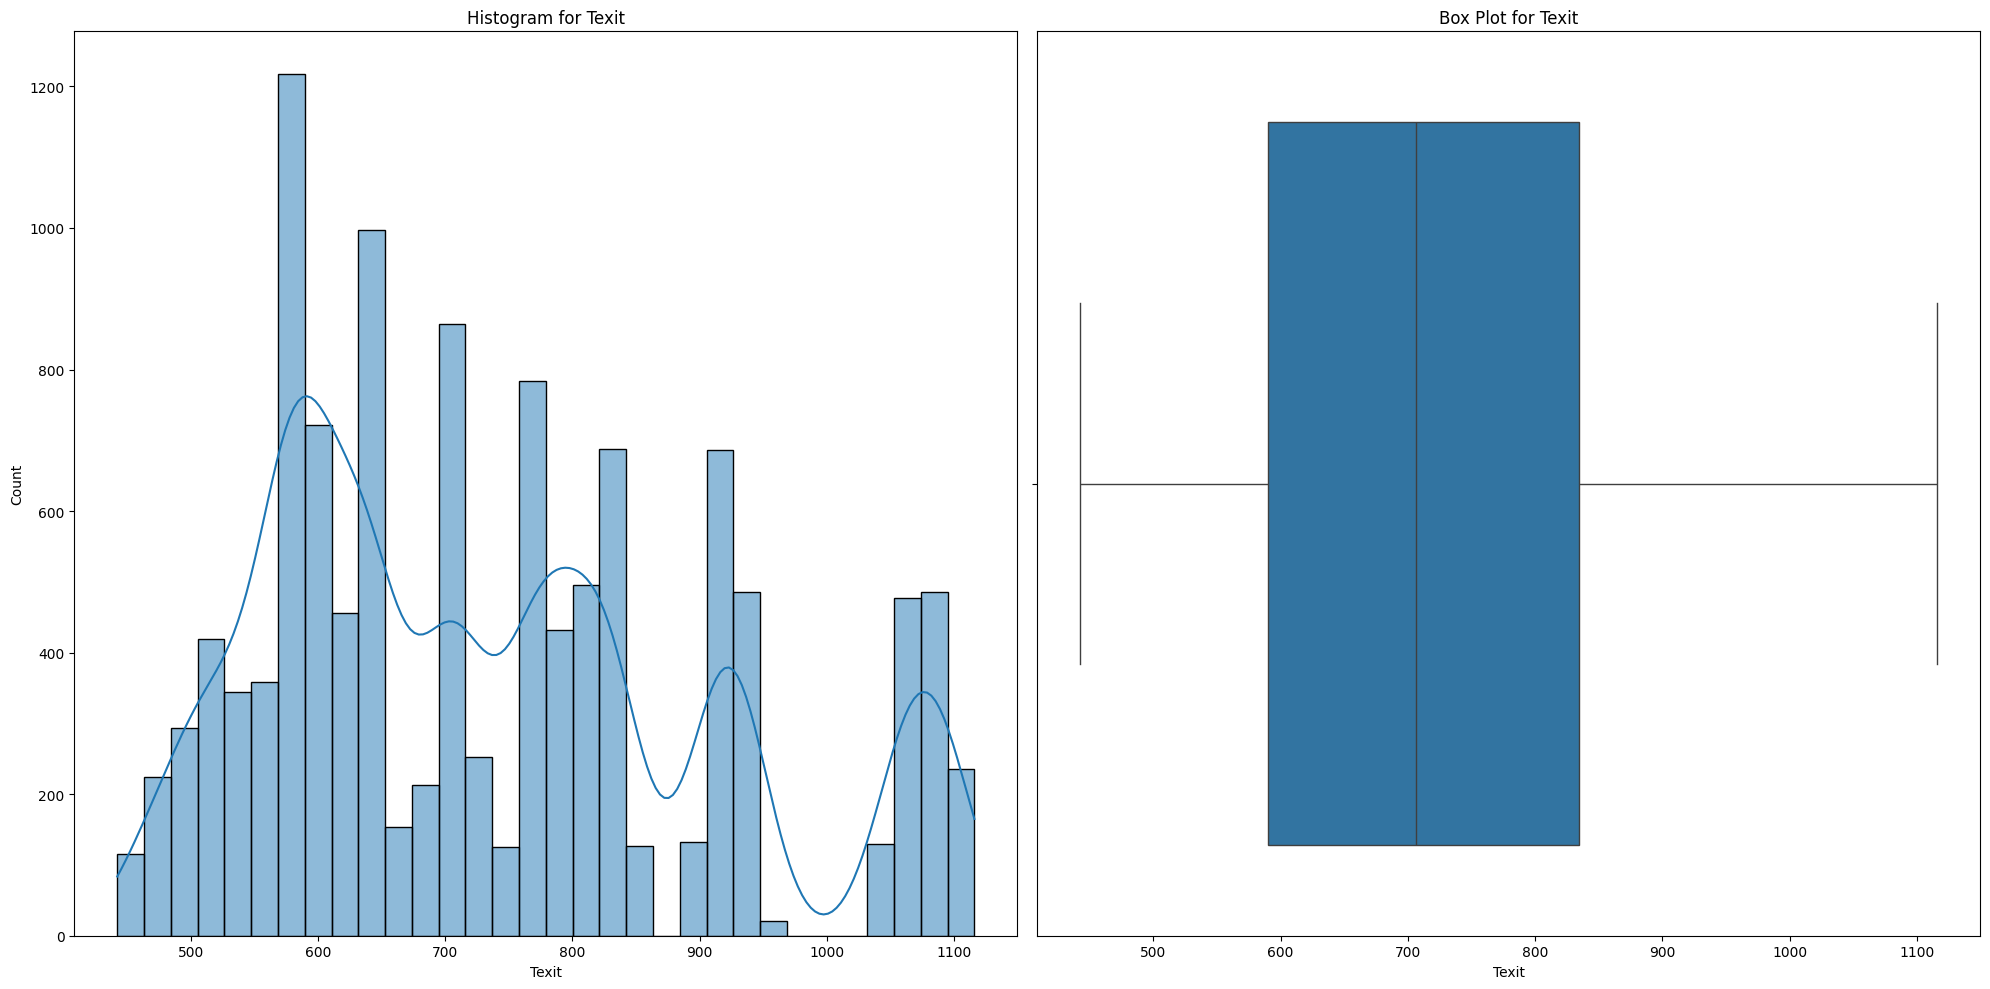

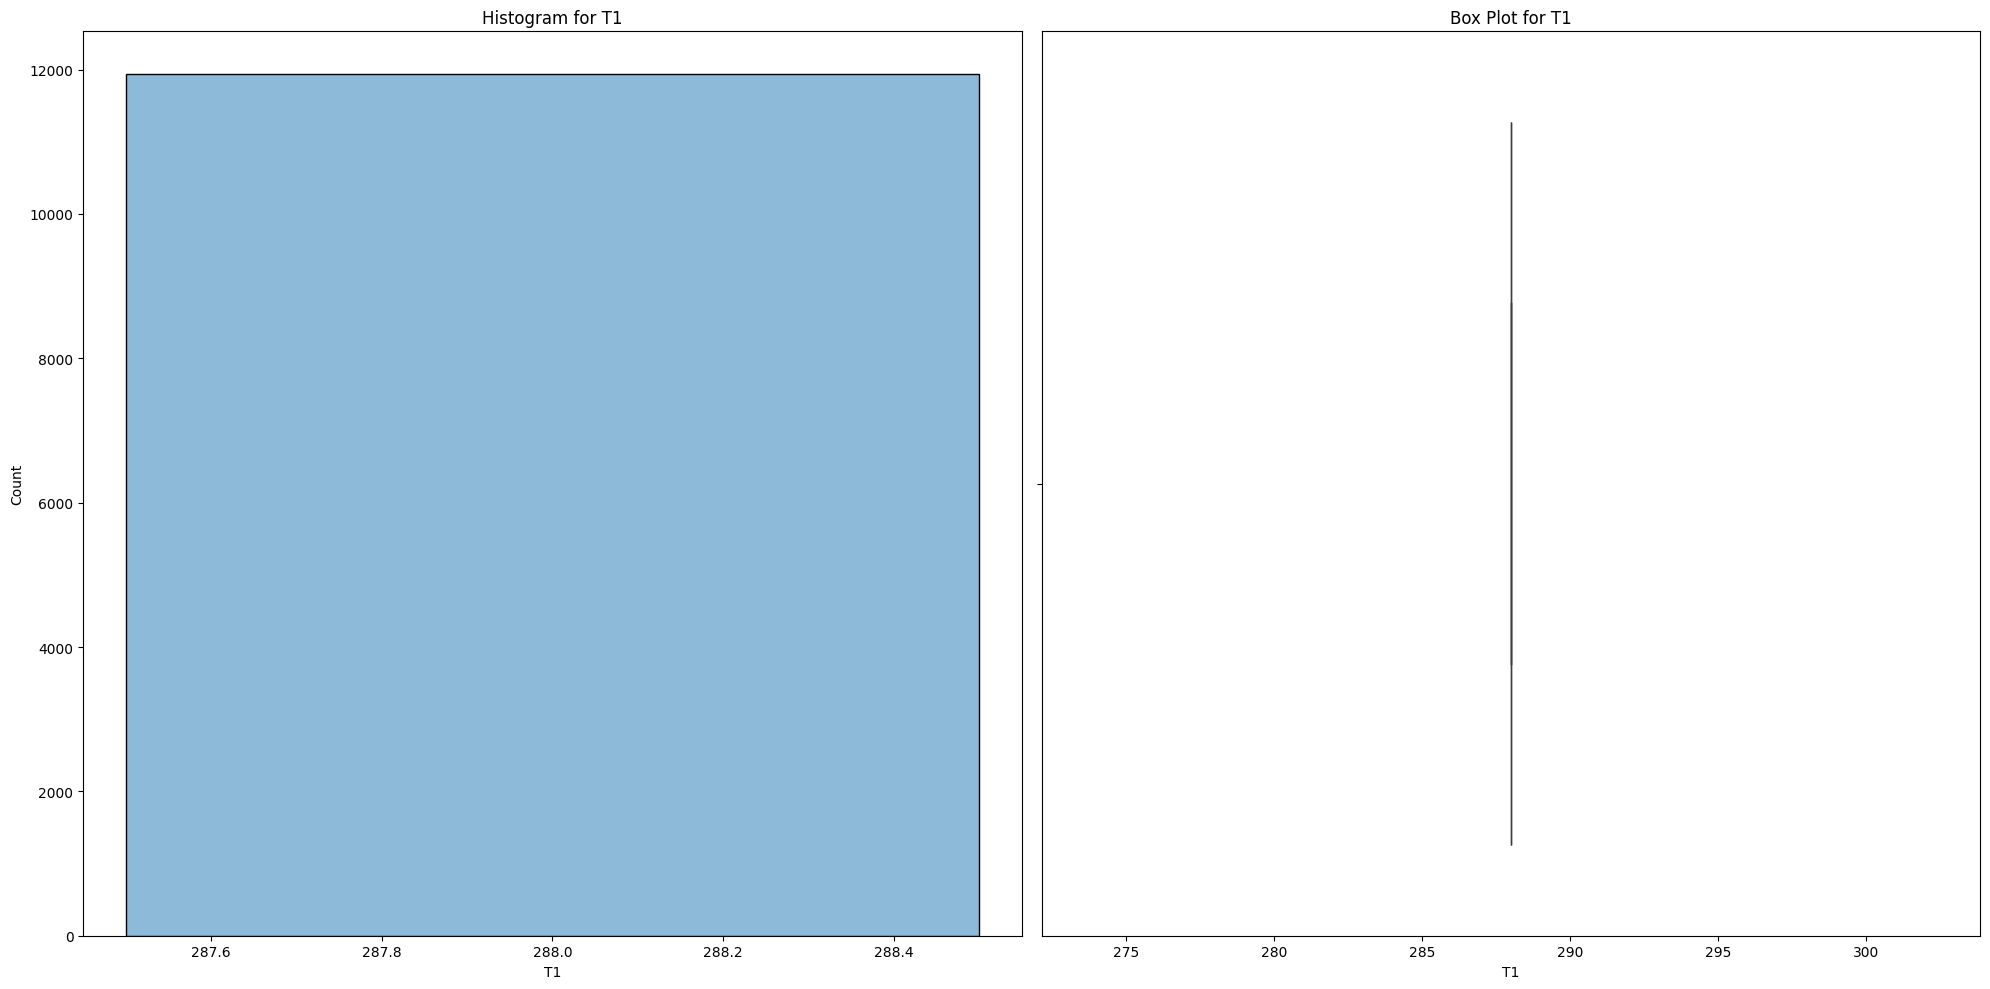

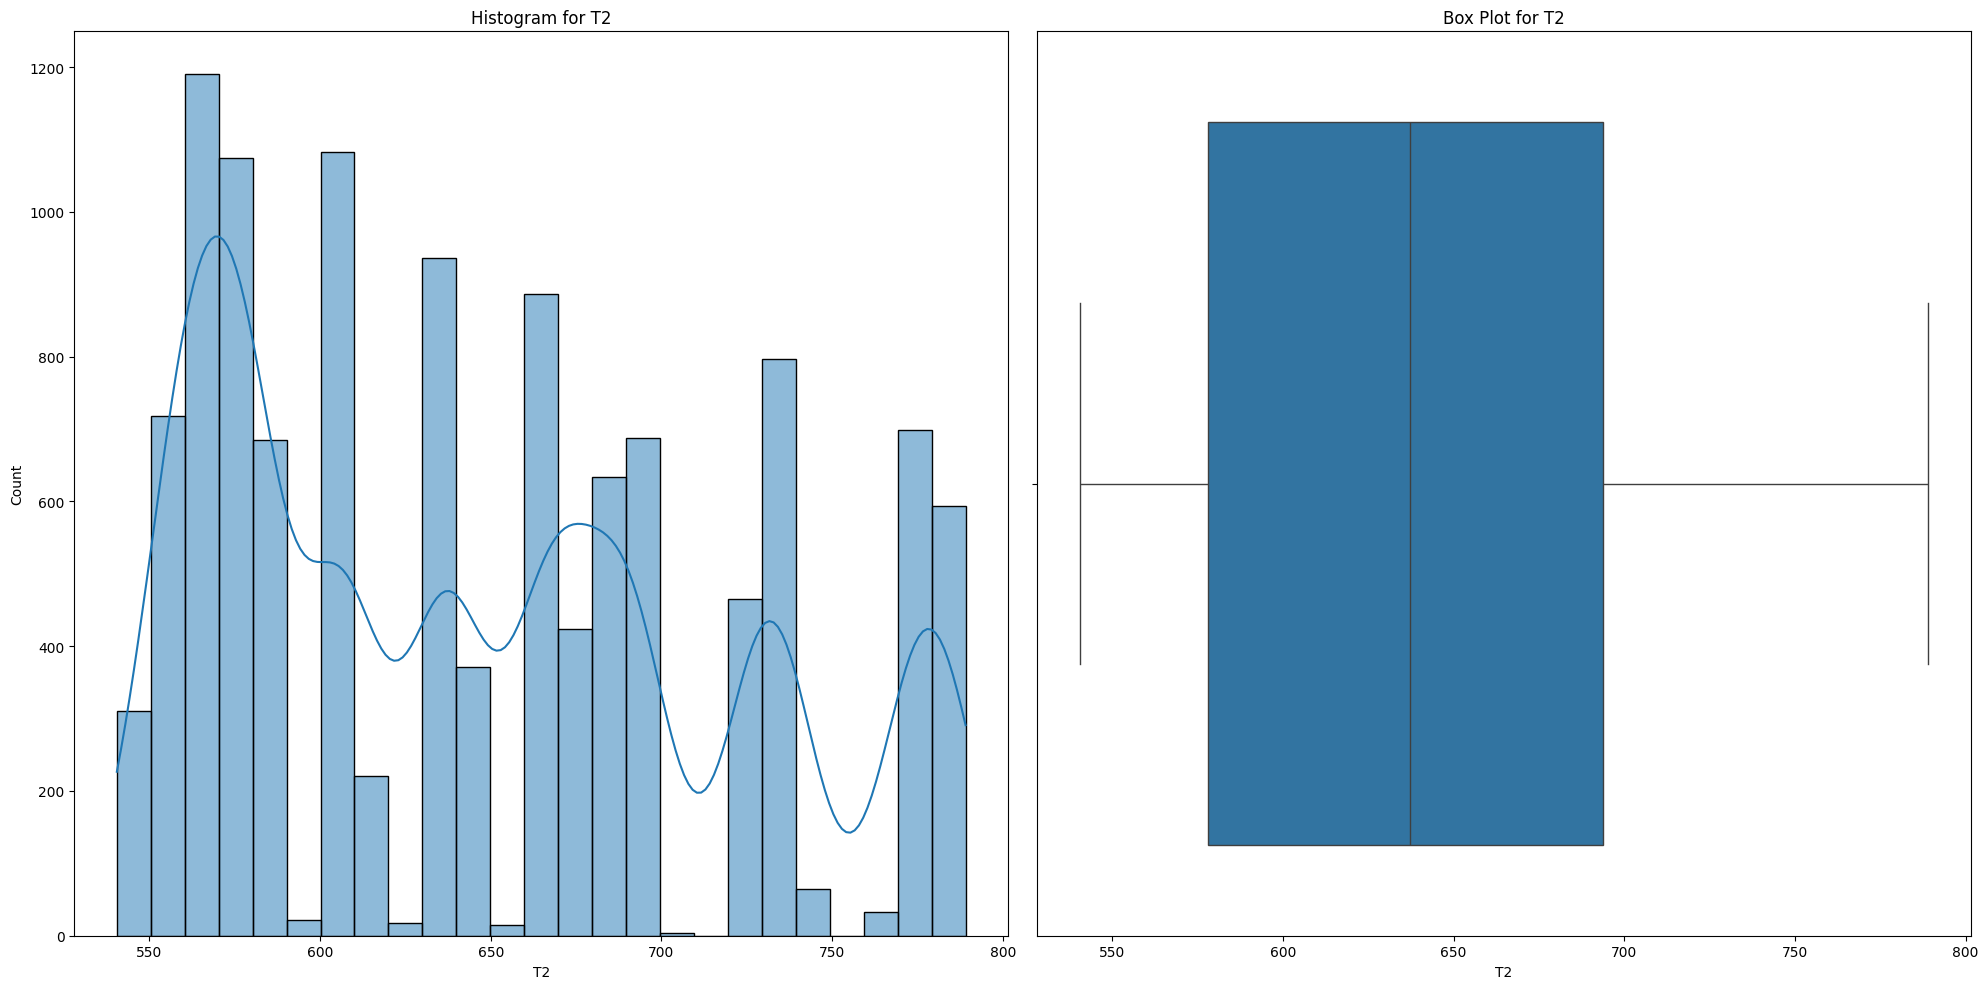

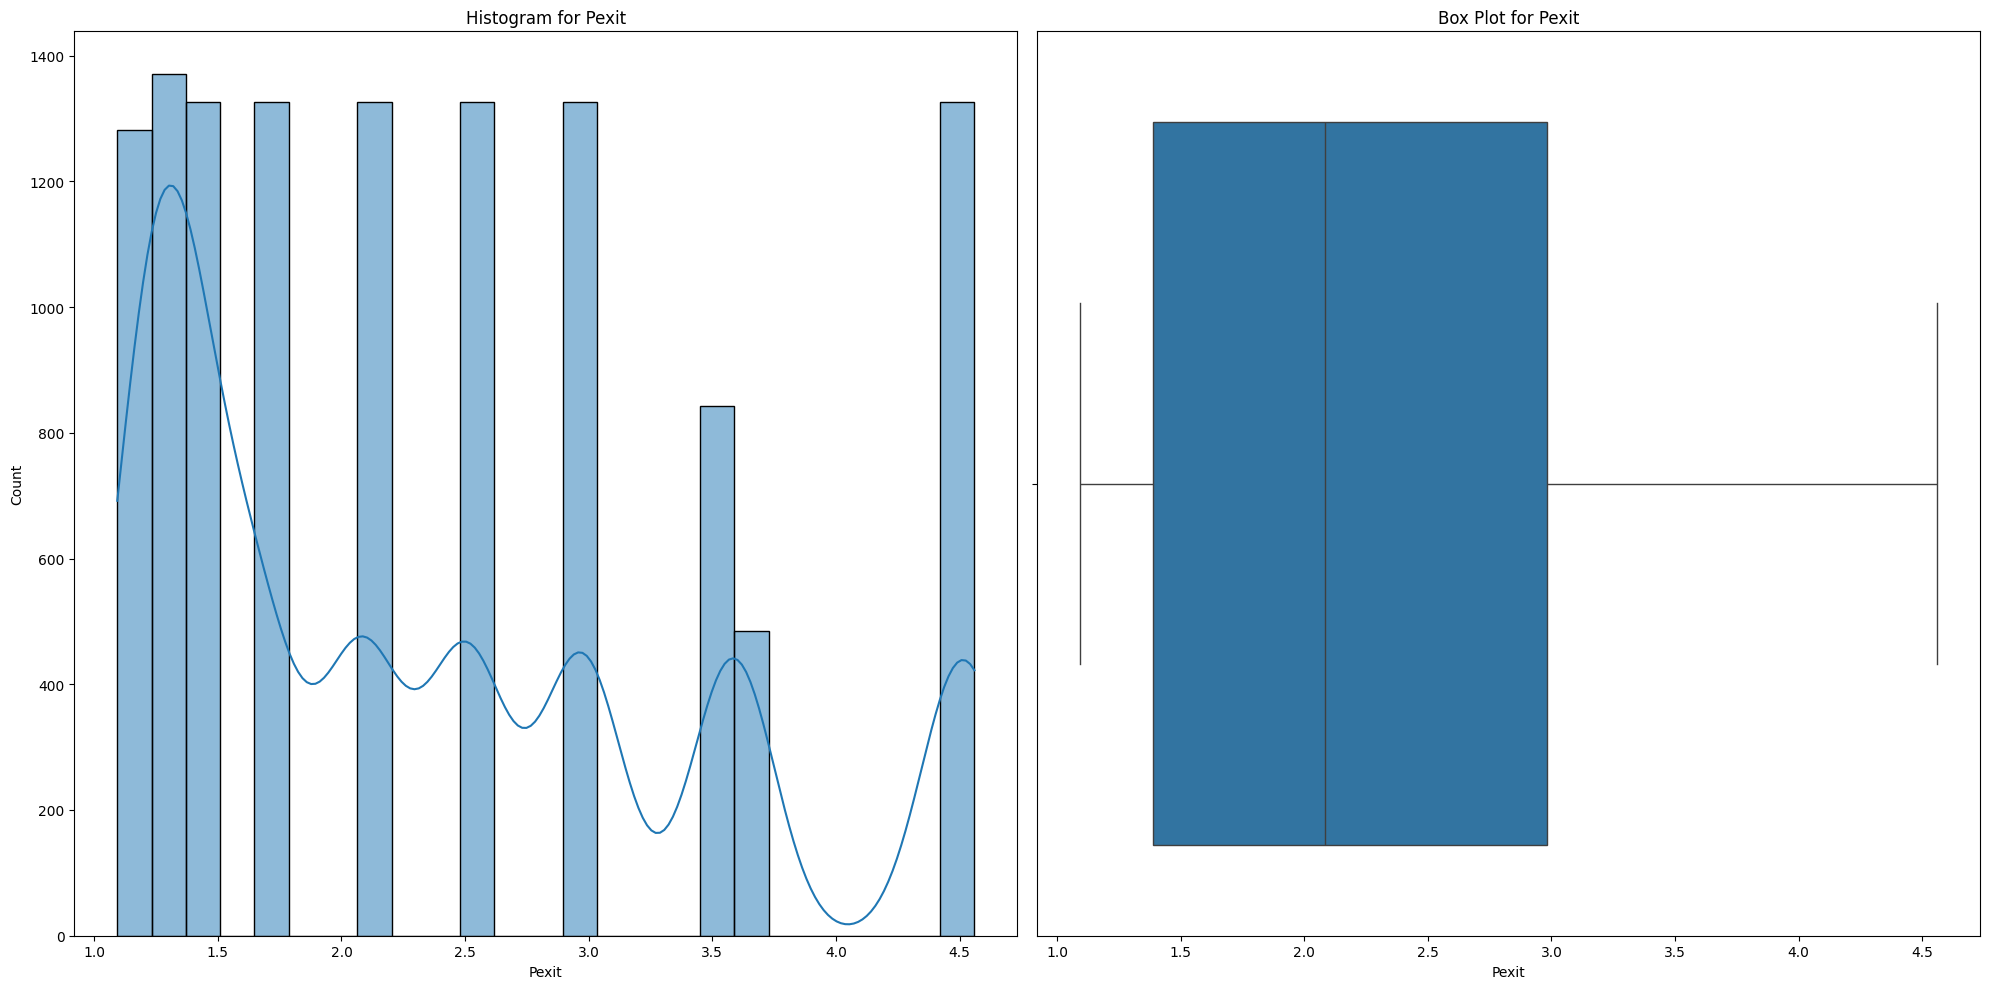

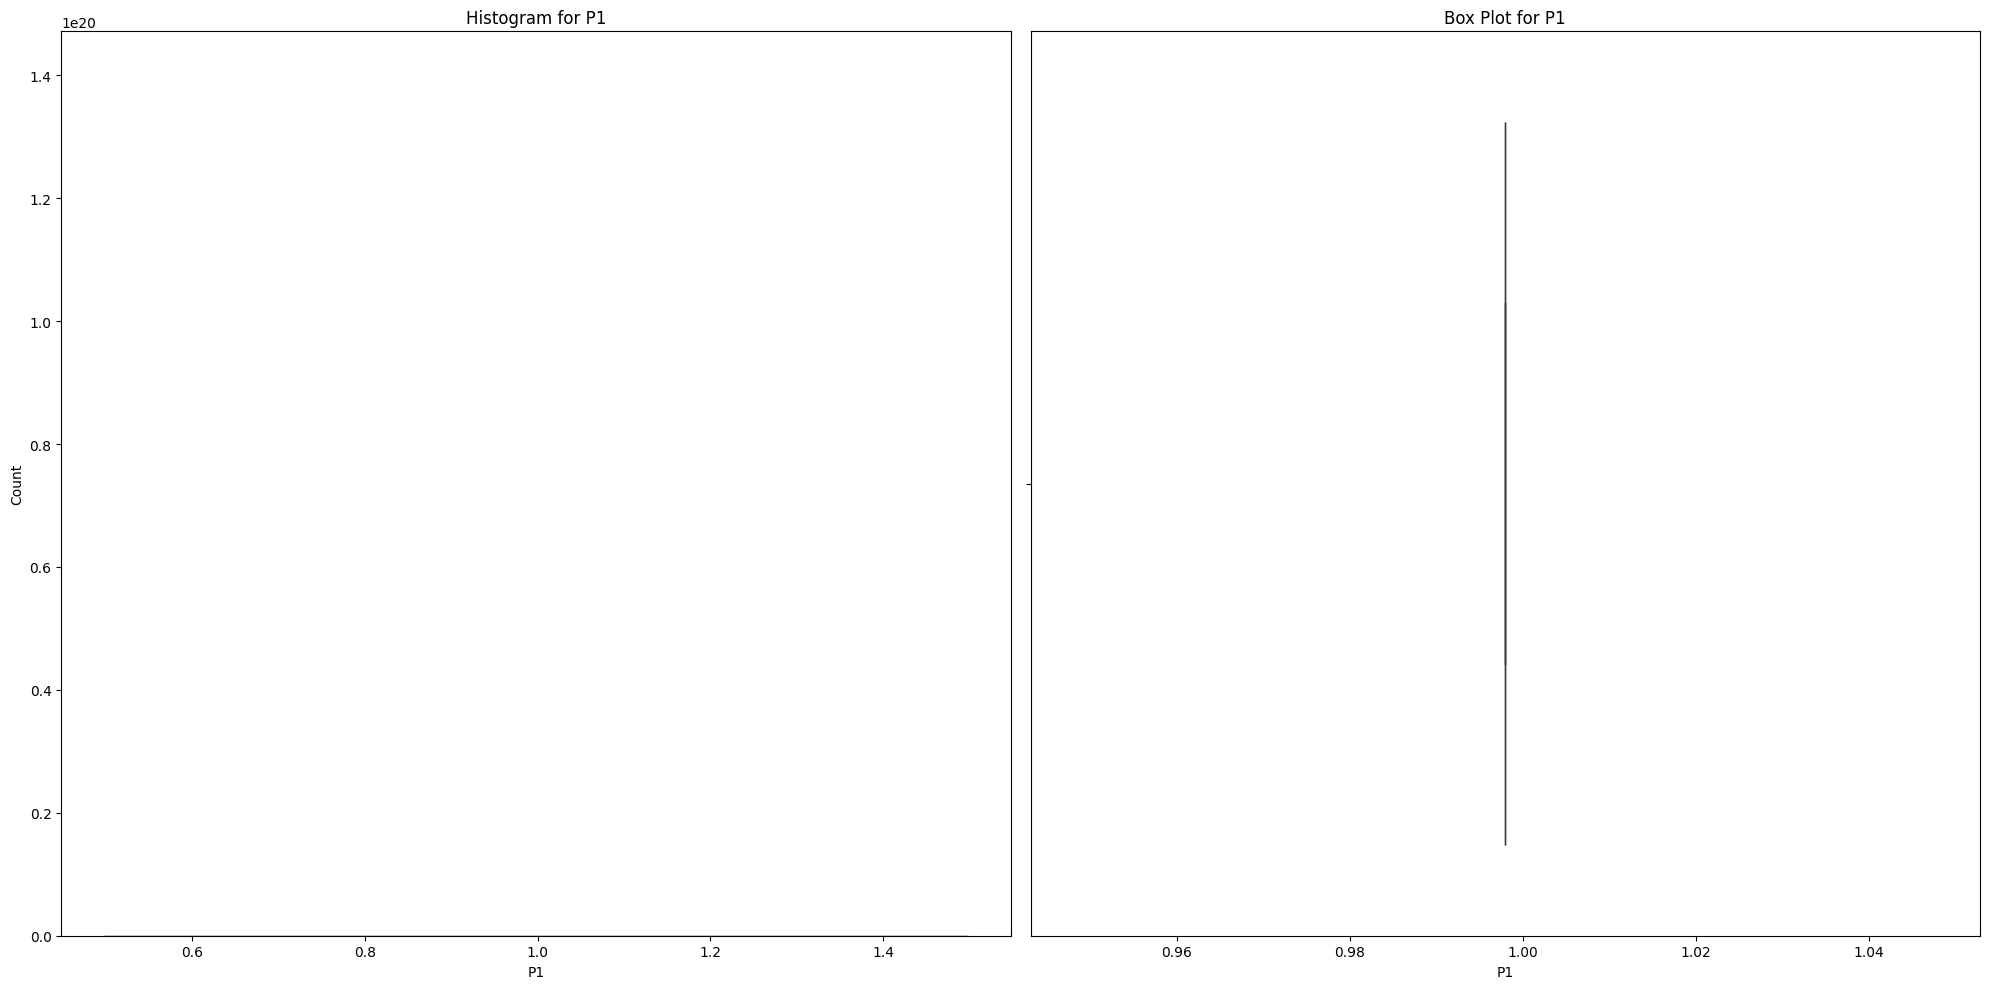

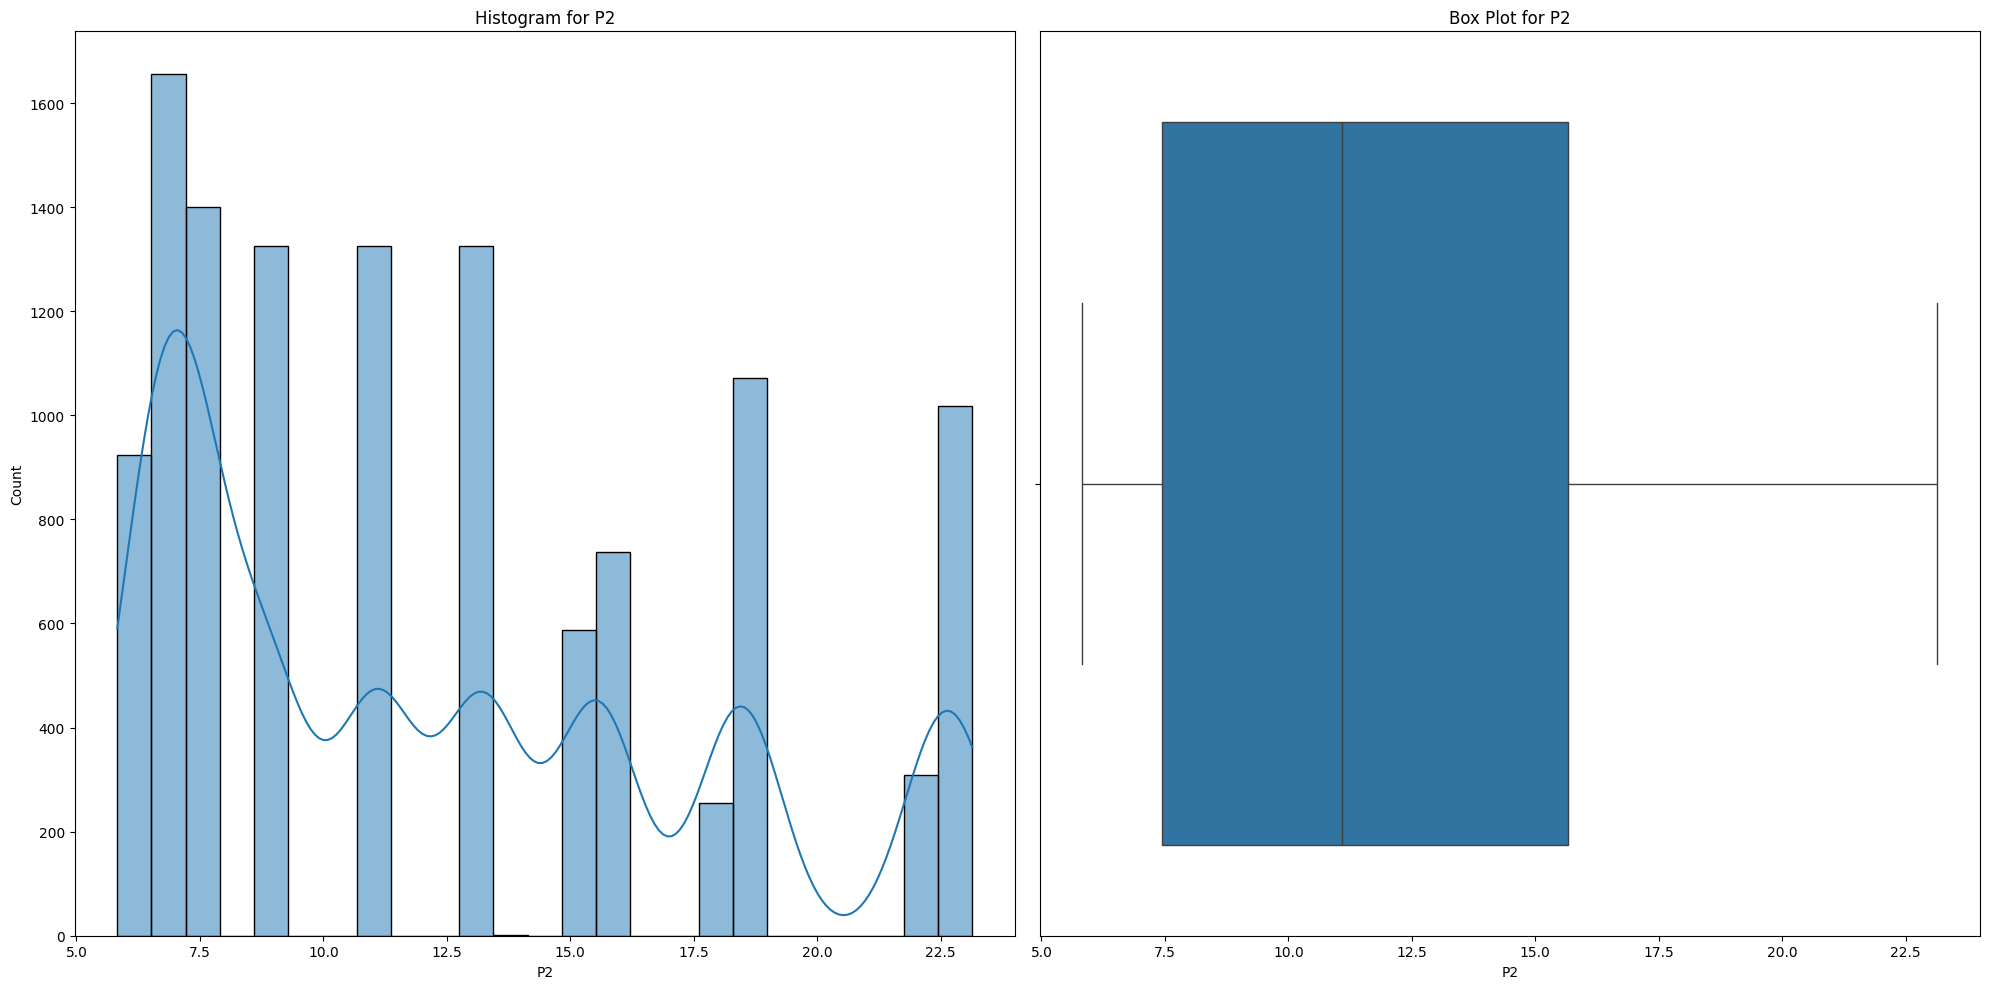

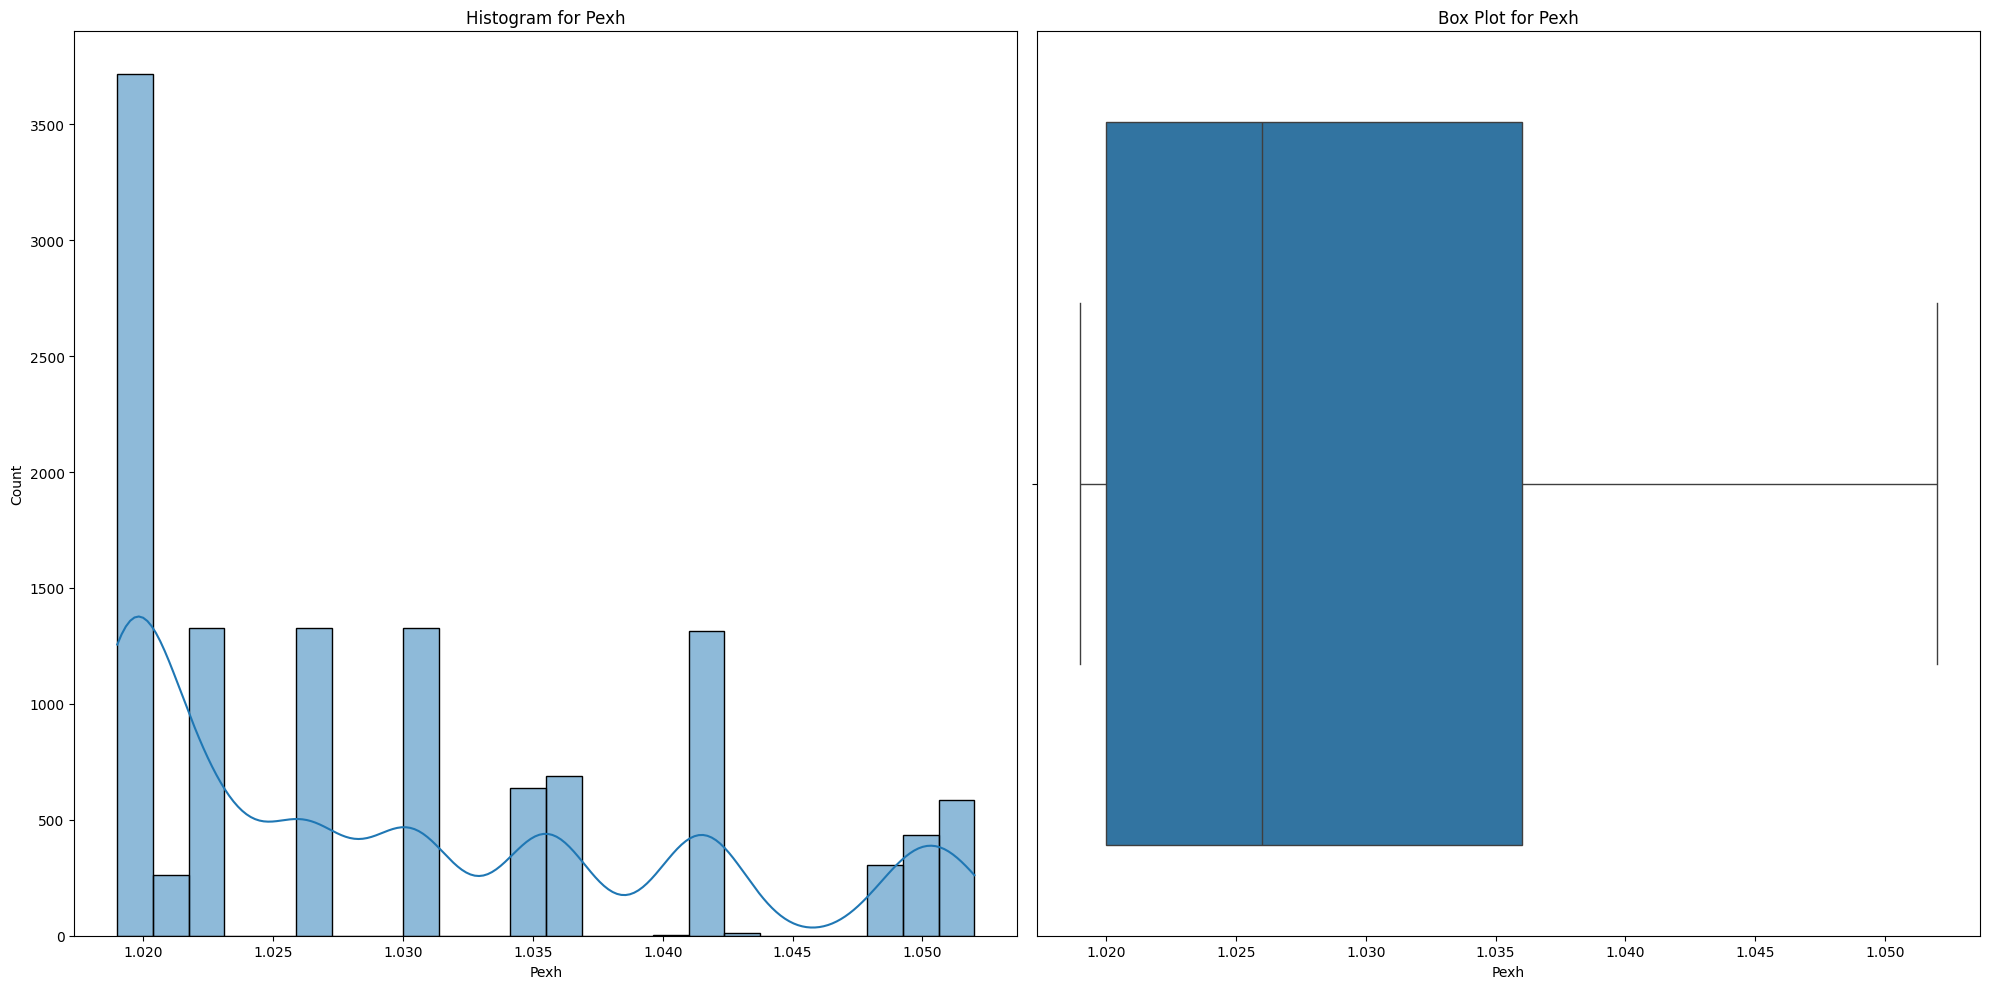

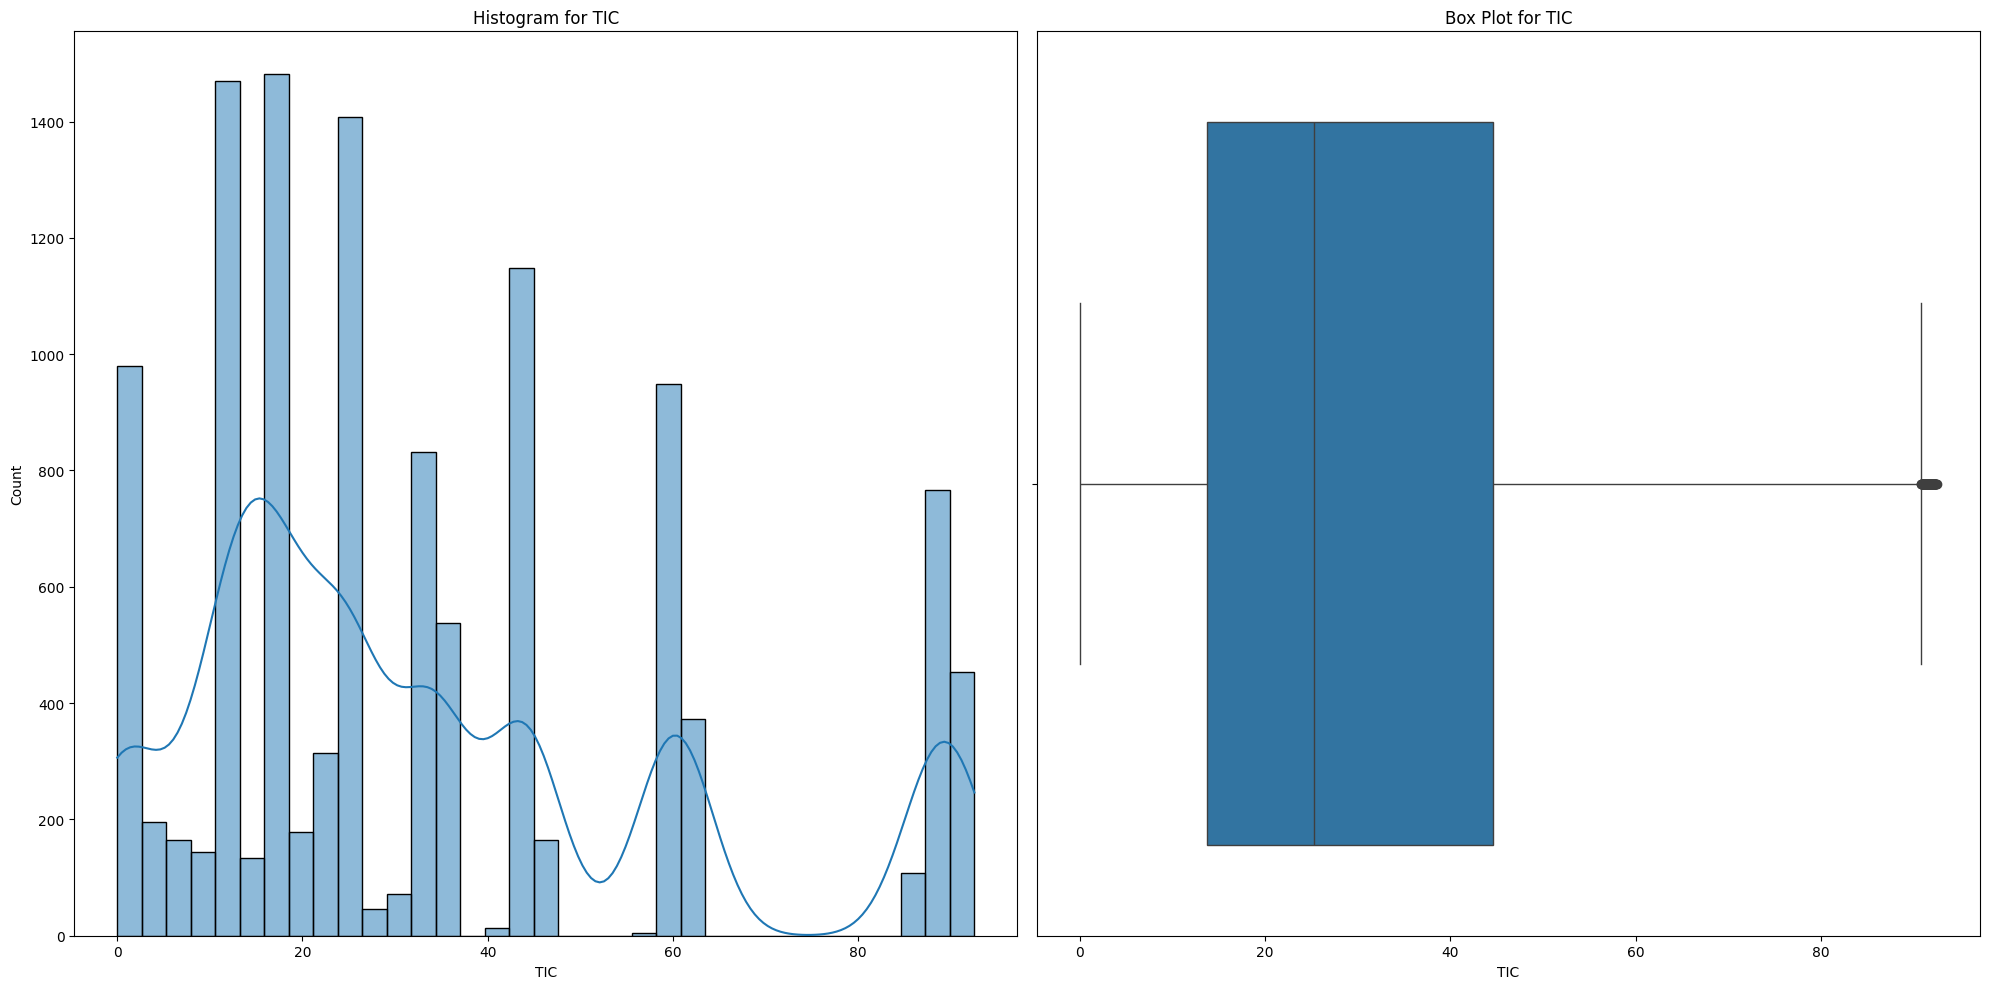

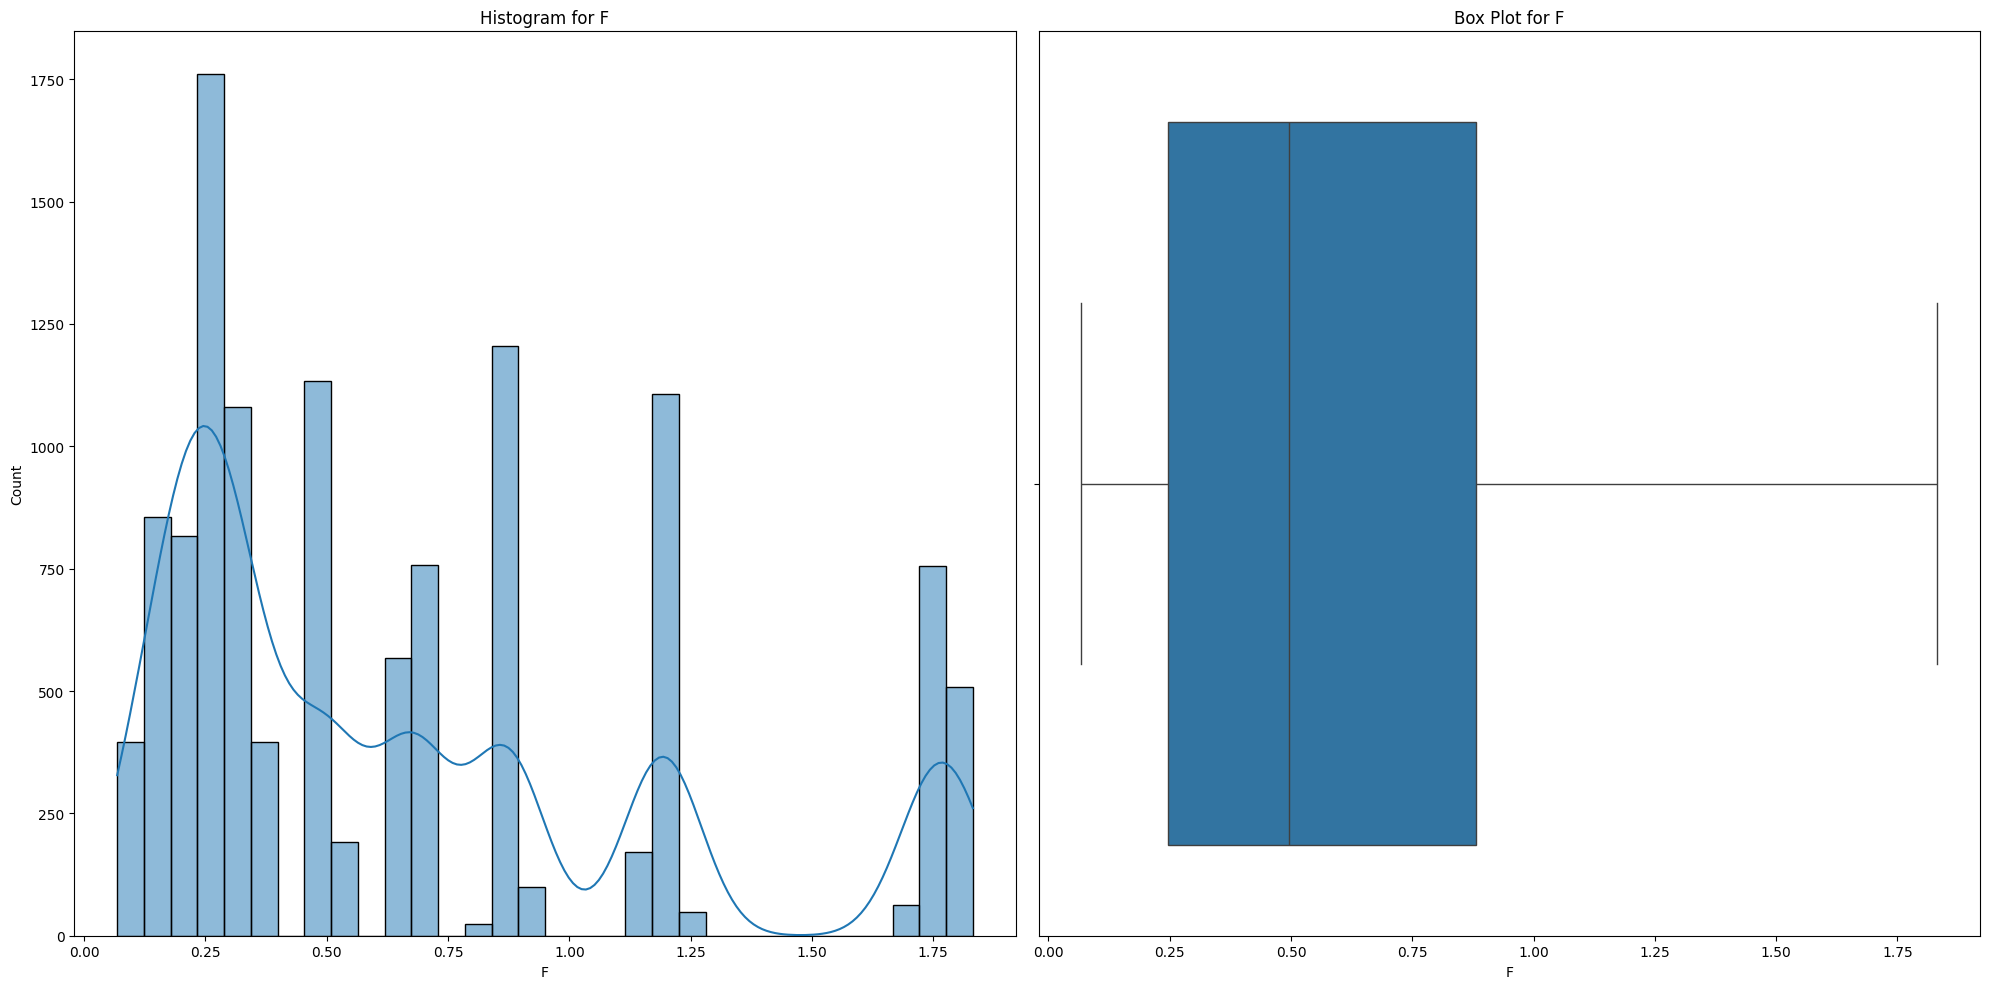

In [18]:
for i,col in enumerate(X.columns):
  fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,10))
  ax[0].set_title(f'Histogram for {col}')
  sns.histplot(data=df,x=col,ax=ax[0],kde=True)
  ax[1].set_title(f'Box Plot for {col}')
  sns.boxplot(data=df,x=col,ax=ax[1])
  plt.tight_layout()
  plt.show()

In [19]:
X.describe()

,Level_Pos,Speed,GTT,GTn,GGn,Ts,Tp,Texit,T1,T2,Pexit,P1,P2,Pexh,TIC,F
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.000000
mean,5.166667,15.000000,27247.498685,2136.289256,8200.947312,227.335768,227.335768,735.495446,288.0,646.215331,2.352963,9.980000e-01,12.297123,1.029474,33.641261,0.662440
std,2.626388,7.746291,22148.613155,774.083881,1091.315507,200.495889,200.495889,173.680552,0.0,72.675882,1.084770,2.220539e-16,5.337448,0.010390,25.841363,0.507132
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,288.0,540.442000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000
25%,3.144000,9.000000,8375.883750,1386.758000,7058.324000,60.317000,60.317000,589.872750,288.0,578.092250,1.389000,9.980000e-01,7.447250,1.020000,13.677500,0.246000
50%,5.140000,15.000000,21630.659000,1924.326000,8482.081500,175.268000,175.268000,706.038000,288.0,637.141500,2.083000,9.980000e-01,11.092000,1.026000,25.276500,0.496000
75%,7.148000,21.000000,39001.426750,2678.079000,9132.606000,332.364750,332.364750,834.066250,288.0,693.924500,2.981000,9.980000e-01,15.658000,1.036000,44.552500,0.882000
max,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000


In [20]:
X['P1'].unique()

array([0.998])

Since P1 and T1 are same for all the samples we can drop them

<Axes: >

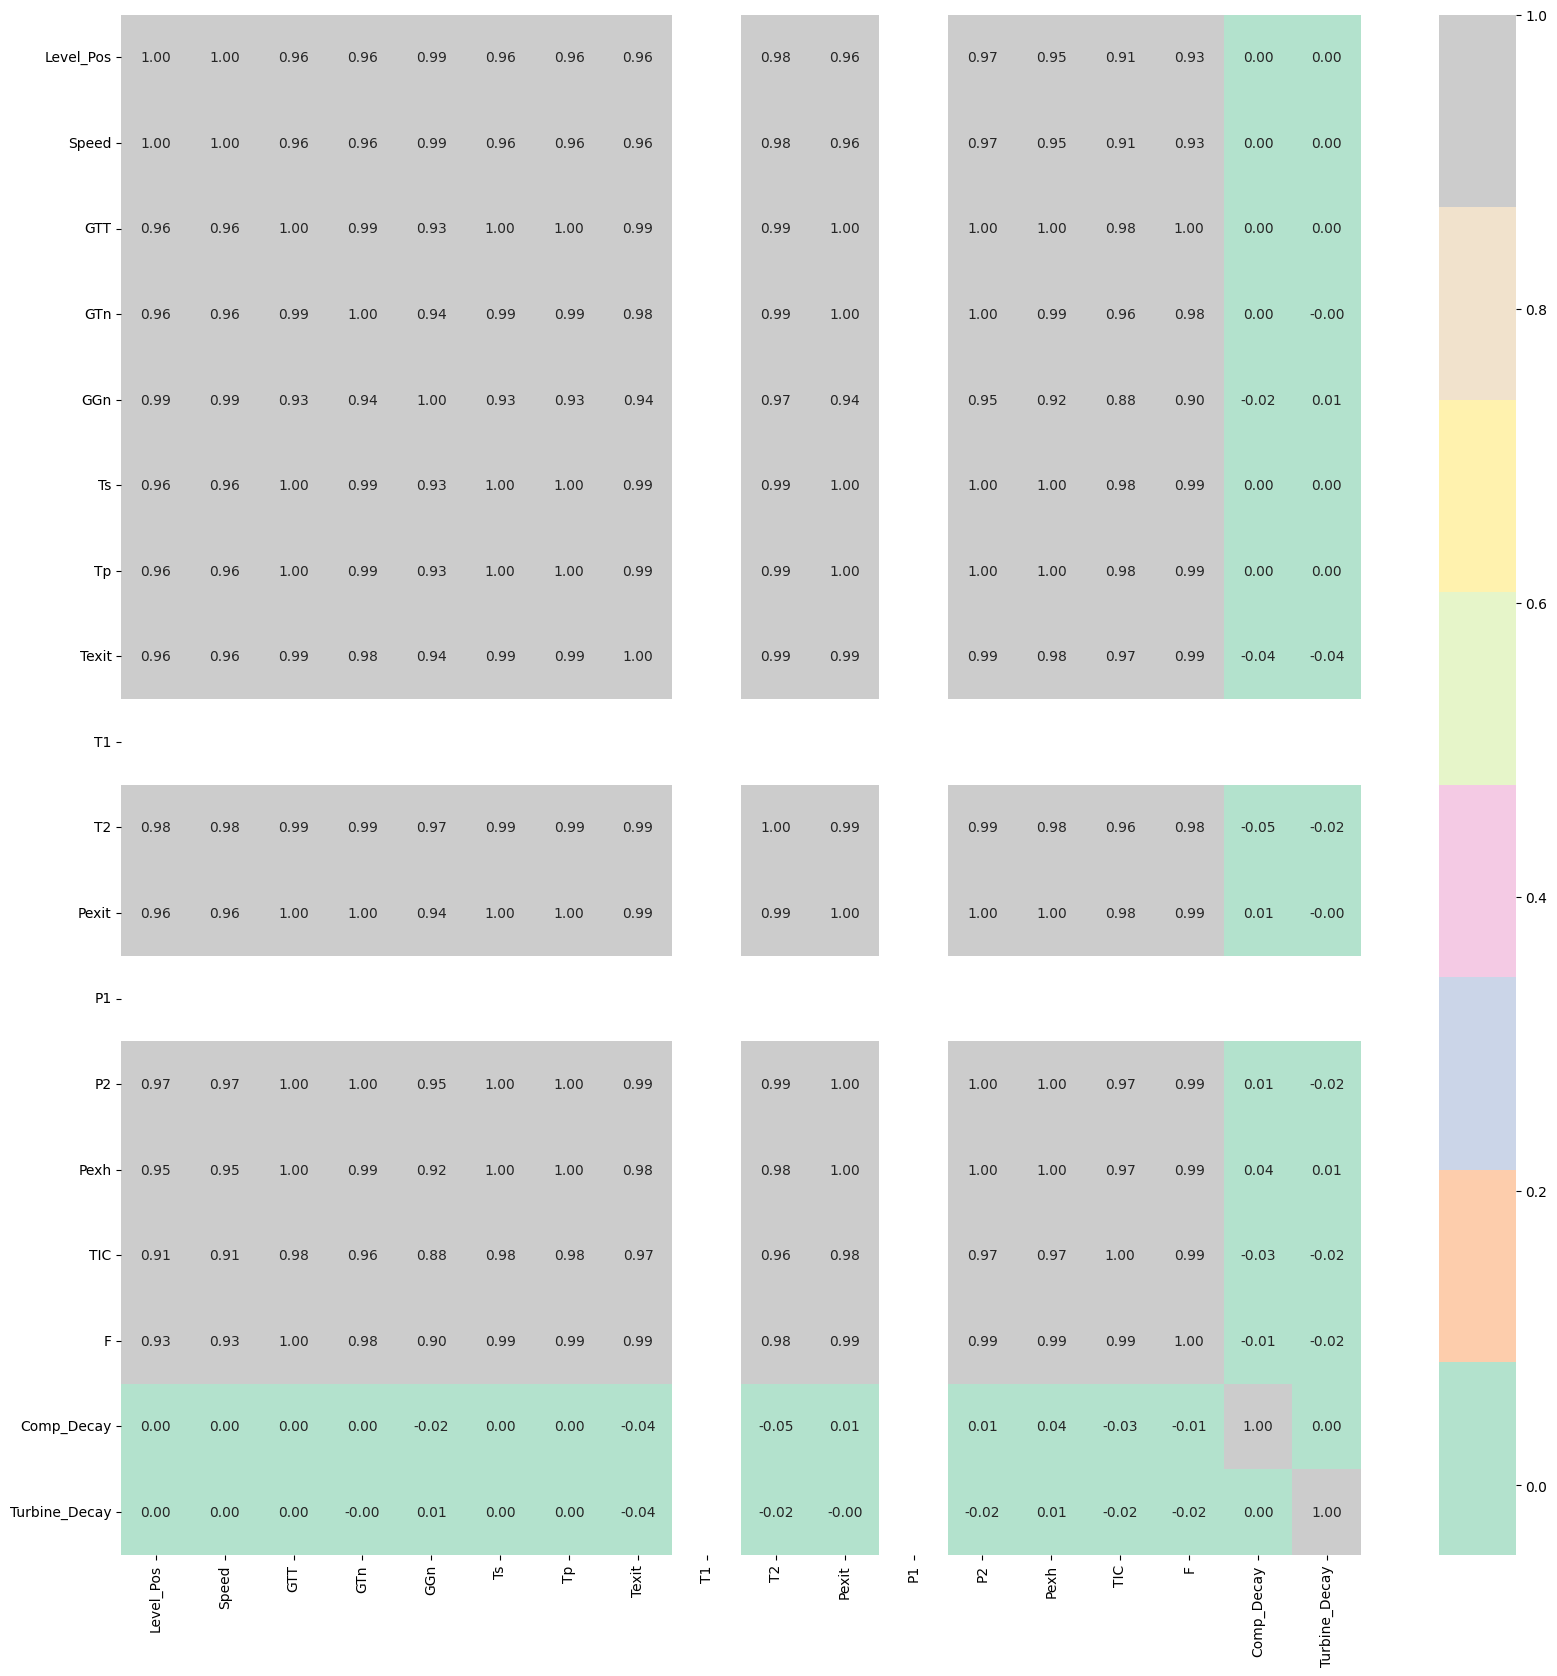

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',cmap='Pastel2')

In [27]:
outliers={}
for col in X.columns:
  mean=X[col].mean()
  std=X[col].std()
  upper=mean+3*std
  lower=mean-3*std
  o=X[(X[col]<lower) | (X[col]>upper)]
  p=len(o)/len(X)*100
  outliers[col]=p

In [28]:
outliers

{'Level_Pos': 0.0,
 'Speed': 0.0,
 'GTT': 0.0,
 'GTn': 0.0,
 'GGn': 0.0,
 'Ts': 0.0,
 'Tp': 0.0,
 'Texit': 0.0,
 'T1': 0.0,
 'T2': 0.0,
 'Pexit': 0.0,
 'P1': 0.0,
 'P2': 0.0,
 'Pexh': 0.0,
 'TIC': 0.0,
 'F': 0.0}

In [30]:
y1.nunique()

51

In [31]:
y2.nunique()

26

In [32]:
X.drop(columns=['T1','P1'],inplace=True)

In [34]:
X.shape

(11934, 14)

Target - Compressor Coefficient

In [35]:
y=y1

<ipython-input-43-0f415a98584e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


<Axes: xlabel='Comp_Decay', ylabel='Density'>

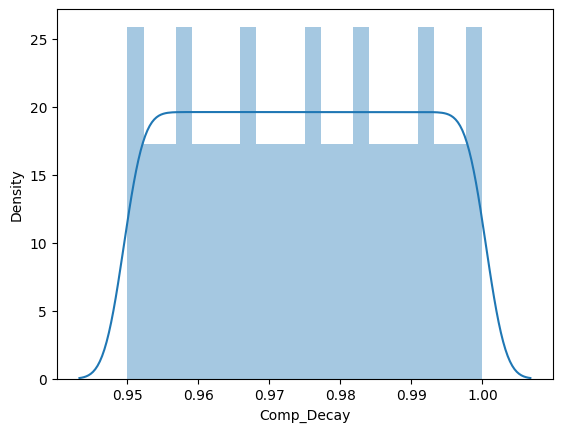

In [43]:
sns.distplot(y)

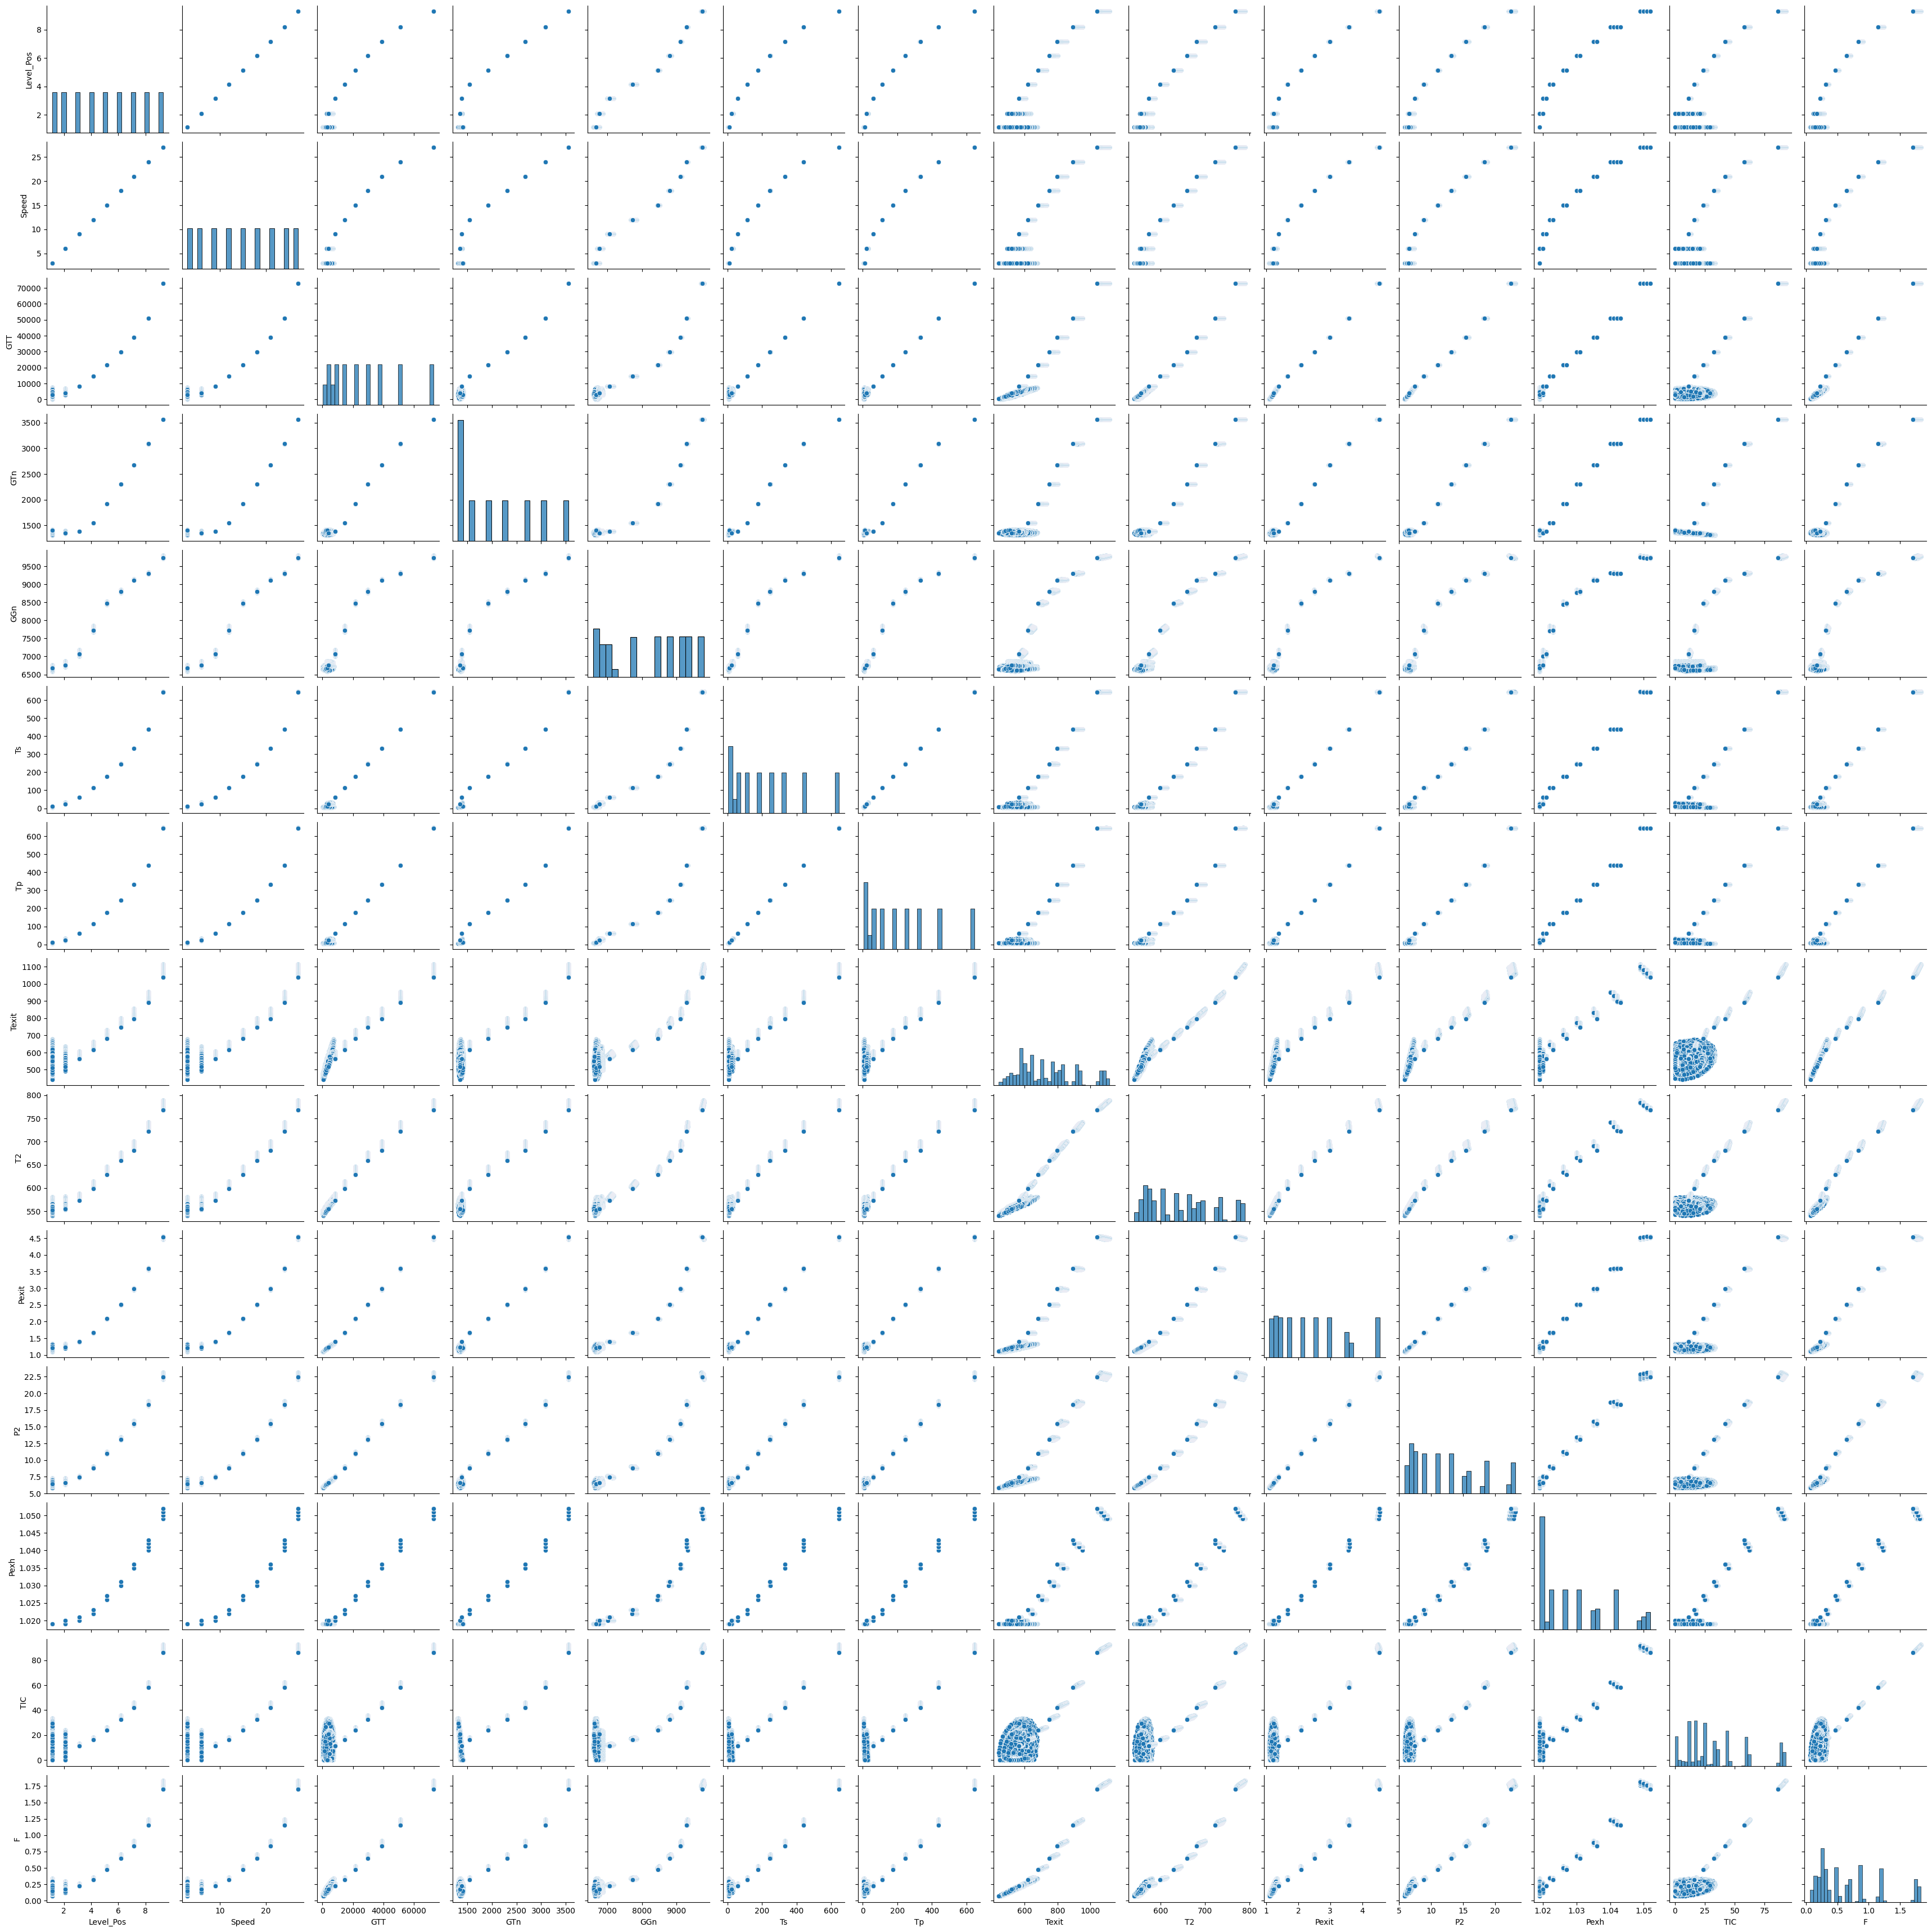

In [45]:
sns.pairplot(X)

Variance Inflation Factor

In [50]:
!pip install statsmodels -q
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [53]:
vif

,Features,VIF
0,Level_Pos,1.938951e+05
1,Speed,1.609968e+05
2,GTT,4.706479e+04
3,GTn,1.330806e+04
4,GGn,1.430804e+04
5,Ts,inf
6,Tp,inf
7,Texit,6.574956e+04
8,T2,1.237947e+05
9,Pexit,1.567184e+05


Ridge Regression and Lasso Regression

In [54]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

In [55]:
from sklearn.metrics import r2_score, mean_squared_error

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [61]:
model1=Ridge()
model2=Lasso()

In [82]:
param_grid={'alpha':[0.00001,0.00005,0.0001,0.001,0.01,0.1,0.5,1,5,10,50]}

In [63]:
from sklearn.model_selection import GridSearchCV

In [83]:
grid1=GridSearchCV(model1,param_grid=param_grid,n_jobs=-1,cv=10)

In [84]:
grid2=GridSearchCV(model2,param_grid=param_grid,n_jobs=-1,cv=10)

In [85]:
grid1.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.001, 0.01, 0.1, 0.5,
                                   1, 5, 10, 50]})

In [86]:
grid1.best_params_

{'alpha': 1e-05}

In [87]:
grid1.best_score_

0.8446209304783279

In [88]:
grid2.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.277e-01, tolerance: 2.070e-04
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.001, 0.01, 0.1, 0.5,
                                   1, 5, 10, 50]})

In [89]:
grid2.best_params_

{'alpha': 1e-05}

In [90]:
grid2.best_score_

0.7383403016948018

In [92]:
model1=Ridge(**grid1.best_params_)
model2=Lasso(**grid2.best_params_)

In [93]:
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.277e-01, tolerance: 2.070e-04
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1e-05)

In [94]:
r1=r2_score(y_test,model1.predict(X_test))
r2=r2_score(y_test,model2.predict(X_test))

mse1=mean_squared_error(y_test,model1.predict(X_test))
mse2=mean_squared_error(y_test,model2.predict(X_test))

In [95]:
print(r1)

print(r2)

print(mse1)

print(mse2)


0.8336028501980852
0.7293762622955905
3.592773271928133e-05
5.8431874147552456e-05


In [97]:
k=np.linalg.matrix_rank(X)

In [98]:
k

13

In [99]:
a_r1=1-((1-r1)*(len(X_test)-1)/(len(X_test)-k-1))

In [100]:
a_r1

0.8326912771060393

In [101]:
a_r2=1-((1-r2)*(len(X_test)-1)/(len(X_test)-1-k))

In [102]:
a_r2

0.7278937049461773

In [103]:
df_compressor=pd.DataFrame()
df_compressor['Models']=['Ridge','Lasso']
df_compressor['R2_Score']=[r1,r2]
df_compressor['MSE']=[mse1,mse2]
df_compressor['Adjusted_R2_Score']=[a_r1,a_r2]

In [104]:
df_compressor

,Models,R2_Score,MSE,Adjusted_R2_Score
0,Ridge,0.833603,0.000036,0.832691
1,Lasso,0.729376,0.000058,0.727894


In [105]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [106]:
rf=RandomForestRegressor()
xr=XGBRegressor()

In [107]:
rf.fit(X_train,y_train)
xr.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [108]:
r3=r2_score(y_test,rf.predict(X_test))
r4=r2_score(y_test,xr.predict(X_test))

In [109]:
r3

0.9949039596681014

In [110]:
r4

0.9925372344264392

In [111]:
mse3=mean_squared_error(y_test,rf.predict(X_test))
mse4=mean_squared_error(y_test,xr.predict(X_test))

In [112]:
mse3

1.1003143695014317e-06

In [113]:
mse4

1.6113271603072942e-06

In [114]:
a_r3=1-((1-r3)*(len(X_test)-1)/(len(X_test)-1-k))
a_r4=1-((1-r4)*(len(X_test)-1)/(len(X_test)-1-k))

In [115]:
s3=['Random Forest Regressor',r3,mse3,a_r3]
s4=['XGBoost Regressor',r4,mse4,a_r4]

In [116]:
df_compressor.loc[2]=s3
df_compressor.loc[3]=s4

In [117]:
df_compressor

,Models,R2_Score,MSE,Adjusted_R2_Score
0,Ridge,0.833603,0.000036,0.832691
1,Lasso,0.729376,0.000058,0.727894
2,Random Forest Regressor,0.994904,0.000001,0.994876
3,XGBoost Regressor,0.992537,0.000002,0.992496


Turbine Decay Coefficient


In [118]:
y=y2

In [120]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [121]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [123]:
r=Ridge()
l=Lasso()
rf=RandomForestRegressor()
x=XGBRegressor()

In [124]:
param_grid_1=param_grid

In [132]:
param_grid_2={'n_estimators':[10,20,50,100,150,200,500],'max_depth':[2,5,10,50,100,None]}

In [133]:
param_grid_3={'n_estimators':[5,10,50,100,150,200,500],'learning_rate':[0.00001,0.0001,0.001,0.01,0.1,0.5,1]}

In [134]:
g1=GridSearchCV(r,cv=10,n_jobs=-1,verbose=1,param_grid=param_grid_1)
g2=GridSearchCV(l,cv=10,n_jobs=-1,verbose=1,param_grid=param_grid_1)
g3=GridSearchCV(rf,cv=10,n_jobs=-1,verbose=1,param_grid=param_grid_2)
g4=GridSearchCV(x,cv=10,n_jobs=-1,verbose=1,param_grid=param_grid_3)

In [135]:
g1.fit(X_train,y_train)

g2.fit(X_train,y_train)

g3.fit(X_train,y_train)

g4.fit(X_train,y_train)


Fitting 10 folds for each of 11 candidates, totalling 110 fits
Fitting 10 folds for each of 11 candidates, totalling 110 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.268e-01, tolerance: 5.344e-05
  model = cd_fast.enet_coordinate_descent(


Fitting 10 folds for each of 42 candidates, totalling 420 fits
Fitting 10 folds for each of 49 candidates, totalling 490 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.5,
                                           1],
                         'n_estimators': [5, 10, 50, 100, 150, 200, 500]},
             verbose=1)

In [136]:
ridge=Ridge(**g1.best_params_)
lasso=Lasso(**g2.best_params_)
rf=RandomForestRegressor(**g3.best_params_)
xgb=XGBRegressor(**g4.best_params_)

In [137]:
df_turbine=pd.DataFrame()
df_turbine['Models']=['Ridge','Lasso','Random Forest Regressor','XGBoost Regressor']

In [139]:
ridge.fit(X_train,y_train)
lasso.fit(X_train,y_train)
rf.fit(X_train,y_train)
xgb.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.268e-01, tolerance: 5.344e-05
  model = cd_fast.enet_coordinate_descent(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [140]:
rr=r2_score(y_test,ridge.predict(X_test))
rl=r2_score(y_test,lasso.predict(X_test))
rrf=r2_score(y_test,rf.predict(X_test))
rx=r2_score(y_test,xgb.predict(X_test))

In [141]:
def adjusted_r2_score(r2,k,n):
  return 1-((1-r2)*(n-1)/(n-k-1))

In [142]:
a1=adjusted_r2_score(rr,k,len(X_test))
a2=adjusted_r2_score(rl,k,len(X_test))
a3=adjusted_r2_score(rrf,k,len(X_test))
a4=adjusted_r2_score(rx,k,len(X_test))

In [143]:
m1=mean_squared_error(y_test,ridge.predict(X_test))
m2=mean_squared_error(y_test,lasso.predict(X_test))
m3=mean_squared_error(y_test,rf.predict(X_test))
m4=mean_squared_error(y_test,xgb.predict(X_test))

In [144]:
df_turbine['R2_Score']=[rr,rl,rrf,rx]
df_turbine['MSE']=[m1,m2,m3,m4]
df_turbine['Adjusted_R2_Score']=[a1,a2,a3,a4]

In [145]:
df_turbine

,Models,R2_Score,MSE,Adjusted_R2_Score
0,Ridge,0.909066,5.202631e-06,0.908568
1,Lasso,0.383761,3.525691e-05,0.380386
2,Random Forest Regressor,0.991184,5.043680e-07,0.991136
3,XGBoost Regressor,0.985932,8.048499e-07,0.985855
